# **FINAL PROJECT - Machine Learning Applications**
--------------------------------------------------------------------------------

ANTHONY MENDOZA - 100529621

CELIA RAMPÉREZ MARTÍN - 100451825

DIEGO HERNÁNDEZ SUÁREZ - 100472809

WOUTER HENDRICKH - 100518303

--------------------------------------------------------------------------------

## Set working directory and requirements

Before initiating our project, it is essential to establish a designated working directory for each group member. This will facilitate an organized and efficient development and execution of our tasks. Since we are utilizing Google Colab for this project, it is necessary to specify unique directory paths for each participant. These paths will serve as the central hubs where each member will store and access project files. Ensuring that these directories are correctly set up will help prevent any conflicts or data loss and will streamline the collaborative process across different environments. This setup will not only support a smoother workflow but also enhance the overall productivity and coordination of our team.


In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

In [ ]:
# profile = "Anthony"
#profile = "Celia"
#profile = "Diego"
profile = "Wouter"

We have established specific directory paths for each team member to streamline and accelerate the process of setting up our working environment. This approach ensures that each member can quickly and efficiently declare their respective paths, facilitating a more agile and cohesive workflow. As we are working in Google Collab, we must also load the drive helper and mount it for authorization.

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

if profile=="Anthony":
    path_to_folder = '/content/drive/My Drive/Colab Notebooks/CARLOS3/Machine Learning Application/Project' # ANTHONY'S PATH
elif profile=="Celia":
    path_to_folder = '/content/drive/My Drive/Machine Learning Applications/Final Project/Datasets' # CELIA'S PATH
elif profile=="Diego":
    path_to_folder = '/content/drive/MyDrive/Machine Learning Applications' # DIEGO'S PATH
elif profile=="Wouter":
    path_to_folder = '/content/drive/My Drive/Final Project/Project/' # WOUTER'S PATH

# Change to assignment directory
os.chdir(path_to_folder)

Mounted at /content/drive


## Import the dataset
Similar to our setup for directory paths, the process of importing and reading the dataset will vary depending on the member working on the project. In our approach, we will begin by loading the training set. To quickly familiarize ourselves with the data, we will utilize the head() function, which provides a snapshot of the initial rows of the dataset. This will allow us to observe the different columns and the types of values each column contains, facilitating a preliminary understanding of the datasets structure and content.

In [ ]:
# IMPORTING TRAIN SET
if profile=="Anthony" or profile == "Wouter":
    trainset_df = pd.read_csv('data/drug_train.csv', sep=";") # ANTHONY'S
elif profile=="Celia" or profile == "Diego":
    trainset_df = pd.read_csv('drug_train.csv') # CELIA's and DIEGO's
trainset_df.head()

Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  
0  monitor blood pressure , weight and asses for ...  
1  I Hate This Birth Control, I Would Not Suggest...  
2  I took 2 pills at the onset of my menstrual cr...  
3  I was given Prilosec prescription at a dose of...  
4                                          See above

The dataset under analysis comprises a variety of columns that collectively offer a comprehensive view of patient feedback on pharmaceutical treatments. The column "Unnamed: 0" functions as an integer-based row identifier. The "urlDrugName" column, a string, lists the drug's name. Patient satisfaction is numerically recorded in the "rating" column, which uses integers for its values. Both "effectiveness" and "sideEffects" are represented as categorical strings, detailing the drug’s efficacy and the severity of any side effects reported by the patients. The "condition" column, also a string, specifies the medical condition being treated. The dataset includes three textual columns: "benefitsReview," "sideEffectsReview," and "commentsReview," each a string containing detailed narratives from patients about the benefits received, side effects experienced, and additional comments regarding their treatment.

 This dataset is especially suited for detailed analytical tasks in the realm of Natural Language Processing within machine learning, as it encompasses both quantitative metrics and qualitative insights into patient experiences with various medications.

Following the same procedure as with the training set, we will also need to read the .csv file to load the test set. This step is crucial as it enables us to evaluate the effectiveness of our models. By analyzing the test set, we can determine how well our models perform under new, unseen conditions, which is essential for understanding the robustness and accuracy of our predictions. This analysis will help us to gauge the generalizability of our models and to make informed decisions about any necessary adjustments or improvements. Again, we will plot the first rows of the data frame to have a look on it.

In [ ]:
# IMPORTING TEST SET
if profile=="Anthony" or profile == "Wouter":
    testset_df = pd.read_csv('data/drug_test.csv', sep=";") # ANTHONY'S
    #testset_df.drop(["Unnamed: 9", "Unnamed: 10", "Unnamed: 11", "Unnamed: 12", "Unnamed: 13", "Unnamed: 14"], axis=1, inplace=True)
elif profile=="Celia" or "Diego":
    testset_df = pd.read_csv('drug_test.csv') # CELIA'S
testset_df.head()

Unnamed: 0 urlDrugName  rating           effectiveness  \
0        1366      biaxin       9  Considerably Effective   
1        3724    lamictal       9        Highly Effective   
2        3824    depakene       4    Moderately Effective   
3         969     sarafem      10        Highly Effective   
4         696    accutane      10        Highly Effective   

           sideEffects           condition  \
0    Mild Side Effects     sinus infection   
1    Mild Side Effects    bipolar disorder   
2  Severe Side Effects    bipolar disorder   
3      No Side Effects  bi-polar / anxiety   
4    Mild Side Effects        nodular acne   

                                      benefitsReview  \
0  The antibiotic may have destroyed bacteria cau...   
1  Lamictal stabilized my serious mood swings. On...   
2  Initial benefits were comparable to the brand ...   
3  It controlls my mood swings. It helps me think...   
4  Within one week of treatment superficial acne ...   

                                   sideEffectsReview  \
0                      Some back pain, some nauseau.   
1  Drowsiness, a bit of mental numbness. If you t...   
2  Depakene has a very thin coating, which caused...   
3            I didnt really notice any side effects.   
4  Side effects included moderate to severe dry s...   

                                      commentsReview Unnamed: 9 Unnamed: 10  \
0  Took the antibiotics for 14 days. Sinus infect...        NaN         NaN   
1  Severe mood swings between hypomania and depre...        NaN         NaN   
2  Depakote was prescribed to me by a Kaiser psyc...        NaN         NaN   
3  This drug may not be for everyone but its wond...        NaN         NaN   
4  Drug was taken in gelatin tablet at 0.5 mg per...        NaN         NaN   

  Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  
0         NaN         NaN         NaN         NaN  
1         NaN         NaN         NaN         NaN  
2         NaN         NaN         NaN         NaN  
3         NaN         NaN         NaN         NaN  
4         NaN         NaN         NaN         NaN

## Task 1: PREPROCESSING AND VECTORIZATION

### Step 1 : Preprocessing

In [ ]:
import re
import nltk

from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
from nltk.tokenize import sent_tokenize
from gensim.models.phrases import Phrases

In [ ]:
# Configure nltk

def check_nltk_packages():
  """
    This function checks for the presence of specific NLTK packages and installs them if they are not already installed.
    The required packages include 'punkt', 'stopwords', 'omw-1.4', and 'wordnet'.
  """
  packages = ['punkt','stopwords','omw-1.4','wordnet'] # List of necessary NLTK packages for text processing
  for package in packages:
    try:
      # Attempt to find the package in the local NLTK data repository
      nltk.data.find('tokenizers/' + package)
    except LookupError:
      # If the package is not found, download it
      nltk.download(package)

# Execute the function to ensure all required packages are available
check_nltk_packages()

# Conditional imports for lxml
try:
  import lxml
except ModuleNotFoundError:
  # If lxml is not installed, install it
  %pip install lxml

# Conditional imports for contractions
try:
  import contractions
except ModuleNotFoundError:
  # If contractions is not installed, install it and then import it
  %pip install contractions
  import contractions

# Import BeautifulSoup from bs4 for HTML/XML parsing
from bs4 import BeautifulSoup

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.2 MB/s eta 0:00:00


In [ ]:
def wrangle_text(text):
    soup = BeautifulSoup(text, 'lxml')
    text_without_tags = soup.get_text() # Get rid of HTML tag
    url_pattern = r'https://\S+|www\.\S+'
    text_without_tags_url = text_without_urls = re.sub(url_pattern, '', text_without_tags) # Replace URL by blank
    text_expanded = contractions.fix(text_without_tags_url) # Expand contraction : I'll => I will
    return text_expanded

In [ ]:
# Perform Tokenization => Homegenization => Cleaning
def prepare_data(text):
    """
    Processes input text for natural language processing applications, including
    tasks such as tokenization, normalization, and phrase detection.

    Args:
        text (str): The text to be processed.

    Returns:
        list: A list of tokens representing the processed text, where each token
        is either a single word or an n-gram.
    """

    # Instantiate lemmatizer and fetch English stopwords
    wnl = WordNetLemmatizer()
    stopwords_en = stopwords.words('english')

    # Text wrangling and cleaning
    wrangled_review = wrangle_text(text)

    # Tokenization
    review_tokens = wordpunct_tokenize(wrangled_review)

    # Homegenization
    # -> Lower case
    review_tokens_lower = [token.lower() for token in review_tokens]
    # -> Keep only alpha numeric
    review_tokens_filtered = []
    for token in review_tokens_lower:
        if token.isalnum():
            review_tokens_filtered.append(token)
    # -> Lemmatization
    lemmatized_review = [wnl.lemmatize(el) for el in review_tokens_filtered]

    # Cleaning
    clean_review = []
    for token in lemmatized_review:
        # Remove stopwords to focus on significant words
        if token not in stopwords_en:
            clean_review.append(token)

    # Detect and process n-grams using the Phrases model
    phrase_model = Phrases(clean_review, min_count=2, threshold=20)
    clean_review_n_gram = [el for el in phrase_model[clean_review]]

    return clean_review_n_gram

In [ ]:
# APPLYING PREPROCESSING TO OUR TEXT VARIABLES IN THE TRAINSET
trainset_df["benefitsReviewPreprocess"] = trainset_df["benefitsReview"].apply(str).apply(prepare_data)
trainset_df["sideEffectsReviewPreprocess"] = trainset_df["sideEffectsReview"].apply(str).apply(prepare_data)
trainset_df["commentsReviewPreprocess"] = trainset_df["commentsReview"].apply(str).apply(prepare_data)
trainset_df.head()

<ipython-input-9-550f6e4147f8>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')
<ipython-input-9-550f6e4147f8>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')
<ipython-input-9-550f6e4147f8>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  \
0  monitor blood pressure , weight and asses for ...   
1  I Hate This Birth Control, I Would Not Suggest...   
2  I took 2 pills at the onset of my menstrual cr...   
3  I was given Prilosec prescription at a dose of...   
4                                          See above   

                            benefitsReviewPreprocess  \
0  [slowed, progression, left, ventricular, dysfu...   
1  [although, type, birth, control, ha, con, pro,...   
2  [wa, used, cramp, badly, would, leave, balled,...   
3  [acid, reflux, went, away, month, day, drug, h...   
4  [think, lyrica, wa, starting, help, pain, side...   

                         sideEffectsReviewPreprocess  \
0  [cough, hypotension, proteinuria, impotence, r...   
1  [heavy, cycle, cramp, hot, flash, fatigue, lon...   
2              [heavier, bleeding, clotting, normal]   
3  [constipation, dry, mouth, mild, dizziness, wo...   
4  [felt, extremely, drugged, dopey, could, drive...   

                            commentsReviewPreprocess  
0  [monitor, blood, pressure, weight, ass, resolu...  
1     [hate, birth, control, would, suggest, anyone]  
2  [took, 2, pill, onset, menstrual, cramp, every...  
3  [wa, given, prilosec, prescription, dose, 45mg...  
4                                              [see]

In [ ]:
print("========== Raw Text ==========")
print(trainset_df.loc[0, "benefitsReview"])
print("\n========== Preprocess Text ==========")
print(trainset_df.loc[0, "benefitsReviewPreprocess"])

========== Raw Text ==========
slowed the progression of left ventricular dysfunction into overt heart failure 

alone or with other agents in the managment of hypertension 

mangagement of congestive heart failur

========== Preprocess Text ==========
['slowed', 'progression', 'left', 'ventricular', 'dysfunction', 'overt', 'heart', 'failure', 'alone', 'agent', 'managment', 'hypertension', 'mangagement', 'congestive', 'heart', 'failur']


In [ ]:
# APPLYING PREPROCESSING TO OUR TEXT VARIABLES IN THE TESTSET
testset_df["benefitsReviewPreprocess"] = testset_df["benefitsReview"].apply(str).apply(prepare_data)
testset_df["sideEffectsReviewPreprocess"] = testset_df["sideEffectsReview"].apply(str).apply(prepare_data)
testset_df["commentsReviewPreprocess"] = testset_df["commentsReview"].apply(str).apply(prepare_data)
testset_df.head()

<ipython-input-9-550f6e4147f8>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')
<ipython-input-9-550f6e4147f8>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')
<ipython-input-9-550f6e4147f8>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, 'lxml')


Unnamed: 0 urlDrugName  rating           effectiveness  \
0        1366      biaxin       9  Considerably Effective   
1        3724    lamictal       9        Highly Effective   
2        3824    depakene       4    Moderately Effective   
3         969     sarafem      10        Highly Effective   
4         696    accutane      10        Highly Effective   

           sideEffects           condition  \
0    Mild Side Effects     sinus infection   
1    Mild Side Effects    bipolar disorder   
2  Severe Side Effects    bipolar disorder   
3      No Side Effects  bi-polar / anxiety   
4    Mild Side Effects        nodular acne   

                                      benefitsReview  \
0  The antibiotic may have destroyed bacteria cau...   
1  Lamictal stabilized my serious mood swings. On...   
2  Initial benefits were comparable to the brand ...   
3  It controlls my mood swings. It helps me think...   
4  Within one week of treatment superficial acne ...   

                                   sideEffectsReview  \
0                      Some back pain, some nauseau.   
1  Drowsiness, a bit of mental numbness. If you t...   
2  Depakene has a very thin coating, which caused...   
3            I didnt really notice any side effects.   
4  Side effects included moderate to severe dry s...   

                                      commentsReview Unnamed: 9 Unnamed: 10  \
0  Took the antibiotics for 14 days. Sinus infect...        NaN         NaN   
1  Severe mood swings between hypomania and depre...        NaN         NaN   
2  Depakote was prescribed to me by a Kaiser psyc...        NaN         NaN   
3  This drug may not be for everyone but its wond...        NaN         NaN   
4  Drug was taken in gelatin tablet at 0.5 mg per...        NaN         NaN   

  Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN   

                            benefitsReviewPreprocess  \
0  [antibiotic, may, destroyed, bacteria, causing...   
1  [lamictal, stabilized, serious, mood, swing, o...   
2  [initial, benefit, comparable, brand, name, ve...   
3  [controlls, mood, swing, help, think, act, spe...   
4  [within, one, week, treatment, superficial, ac...   

                         sideEffectsReviewPreprocess  \
0                              [back, pain, nauseau]   
1  [drowsiness, bit, mental, numbness, take, much...   
2  [depakene, ha, thin, coating, caused, severe, ...   
3                     [really, notice, side, effect]   
4  [side, effect, included, moderate, severe, dry...   

                            commentsReviewPreprocess  
0  [took, antibiotic, 14, day, sinus, infection, ...  
1  [severe, mood, swing, hypomania, depression, s...  
2  [depakote, wa, prescribed, kaiser, psychiatris...  
3  [drug, may, everyone, wonderful, make, totally...  
4  [drug, wa, taken, gelatin, tablet, 0, 5, mg, p...

In [ ]:
print("========== Raw Text ==========")
print(testset_df.loc[0, "benefitsReview"])
print("\n========== Preprocess Text ==========")
print(testset_df.loc[0, "benefitsReviewPreprocess"])

========== Raw Text ==========
The antibiotic may have destroyed bacteria causing my sinus infection.  But it may also have been caused by a virus, so its hard to say.

========== Preprocess Text ==========
['antibiotic', 'may', 'destroyed', 'bacteria', 'causing', 'sinus', 'infection', 'may', 'also', 'caused', 'virus', 'hard', 'say']


#### benefitsReview Visualization

In [ ]:
tokens_corpusB = [token for document in trainset_df["benefitsReviewPreprocess"] for token in document]
countsB  = nltk.FreqDist(tokens_corpusB)
most_common_wordsB = countsB.most_common(25)
mostB = pd.DataFrame(most_common_wordsB, columns=['words', 'counts'])

most_common_wordsB

[('wa', 1838),
 ('day', 648),
 ('pain', 617),
 ('drug', 495),
 ('taking', 469),
 ('time', 451),
 ('effect', 438),
 ('also', 398),
 ('medication', 385),
 ('year', 371),
 ('skin', 363),
 ('treatment', 361),
 ('would', 355),
 ('sleep', 351),
 ('benefit', 349),
 ('able', 339),
 ('better', 332),
 ('ha', 328),
 ('week', 327),
 ('take', 321),
 ('symptom', 295),
 ('feel', 293),
 ('much', 290),
 ('side', 290),
 ('get', 289)]

<ipython-input-16-0a0a2cb4d198>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='words', x='counts', data=mostB, palette='viridis')


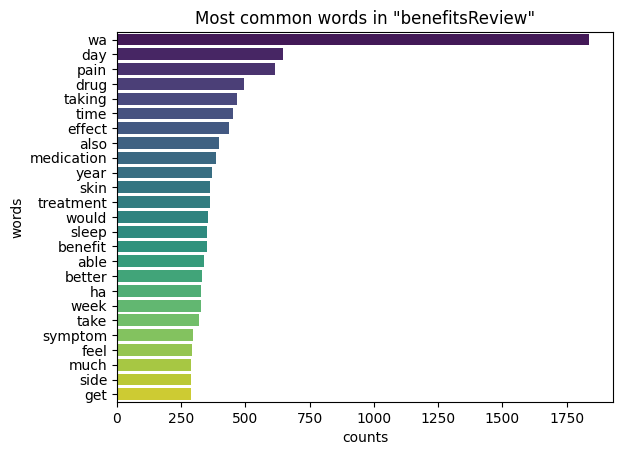

In [ ]:
sns.barplot(y='words', x='counts', data=mostB, palette='viridis')
plt.title('Most common words in "benefitsReview"')
plt.show()

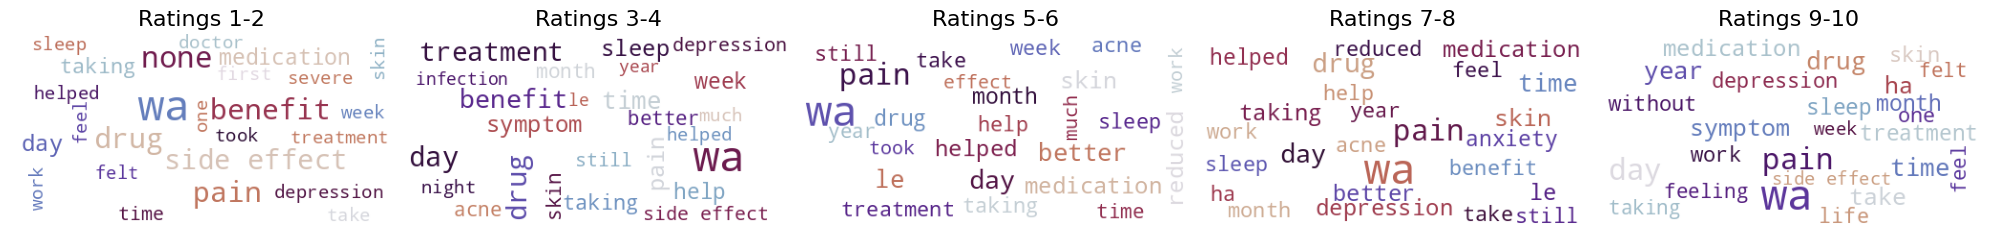

In [ ]:
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud

rating_pairs = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True, sharey=True)

for j, ax in enumerate(axes.flatten()):
    lower_rating, upper_rating = rating_pairs[j]
    data_ratings = trainset_df[trainset_df['rating'].isin([lower_rating, upper_rating])]

    corpus_ratings = [token for doc in data_ratings['benefitsReviewPreprocess'] for token in doc]
    counts = nltk.FreqDist(corpus_ratings)

    cloud = WordCloud(max_font_size=45, max_words=25, background_color="white", colormap='twilight').generate(' '.join(corpus_ratings))
    ax.imshow(cloud)
    ax.set_title(f'Ratings {lower_rating}-{upper_rating}', fontdict=dict(size=16))
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()


#### sideEffectsReview Visualization

In [ ]:
tokens_corpusSE = [token for document in trainset_df["sideEffectsReviewPreprocess"] for token in document]
countsSE  = nltk.FreqDist(tokens_corpusSE)
most_common_wordsSE = countsSE.most_common(25)
mostSE = pd.DataFrame(most_common_wordsSE, columns=['words', 'counts'])

most_common_wordsSE

[('wa', 1334),
 ('effect', 1264),
 ('side', 1218),
 ('day', 592),
 ('taking', 537),
 ('time', 465),
 ('drug', 414),
 ('also', 386),
 ('medication', 367),
 ('would', 364),
 ('pain', 356),
 ('skin', 347),
 ('none', 346),
 ('first', 330),
 ('take', 322),
 ('week', 316),
 ('dry', 300),
 ('severe', 262),
 ('like', 261),
 ('felt', 259),
 ('weight', 255),
 ('could', 245),
 ('feel', 230),
 ('mild', 228),
 ('experienced', 226)]

<ipython-input-19-87cfd0b02f42>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='words', x='counts', data=mostSE, palette='viridis')


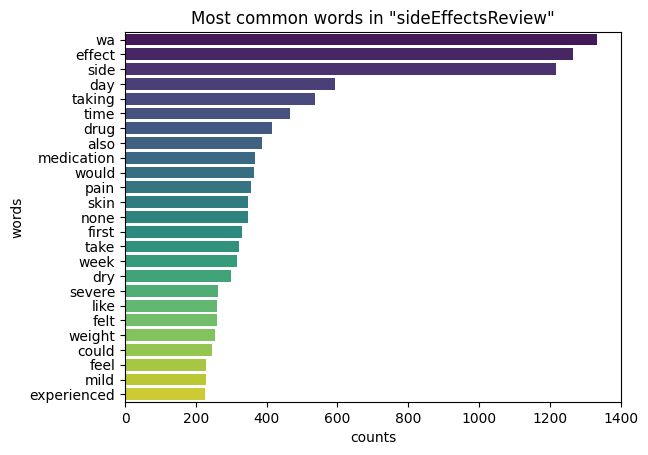

In [ ]:
sns.barplot(y='words', x='counts', data=mostSE, palette='viridis')
plt.title('Most common words in "sideEffectsReview"')
plt.show()

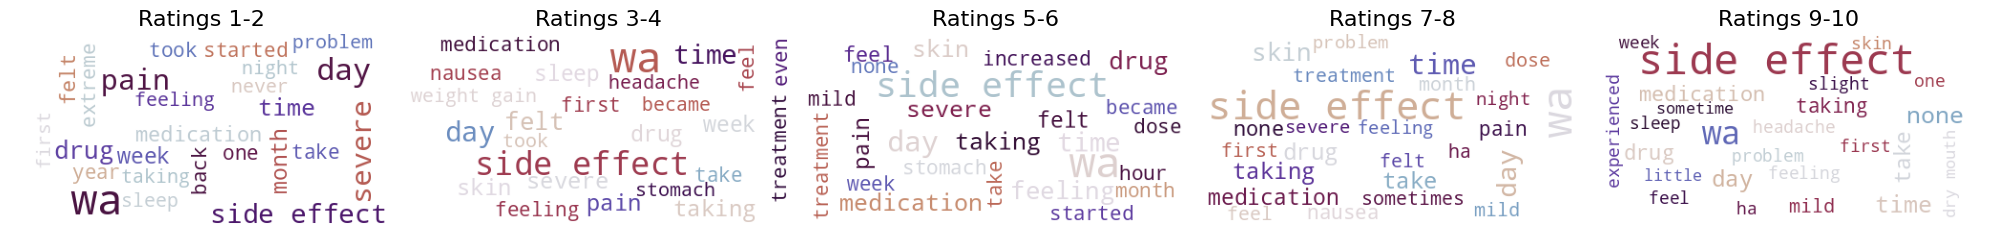

In [ ]:
rating_pairs = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True, sharey=True)

for j, ax in enumerate(axes.flatten()):
    lower_rating, upper_rating = rating_pairs[j]
    data_ratings = trainset_df[trainset_df['rating'].isin([lower_rating, upper_rating])]

    corpus_ratings = [token for doc in data_ratings['sideEffectsReviewPreprocess'] for token in doc]
    counts = nltk.FreqDist(corpus_ratings)

    cloud = WordCloud(max_font_size=45, max_words=25, background_color="white", colormap='twilight').generate(' '.join(corpus_ratings))
    ax.imshow(cloud)
    ax.set_title(f'Ratings {lower_rating}-{upper_rating}', fontdict=dict(size=16))
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

#### commentsReview Visualization

In [ ]:
tokens_corpusC = [token for document in trainset_df["commentsReviewPreprocess"] for token in document]
countsC  = nltk.FreqDist(tokens_corpusC)
most_common_wordsC = countsC.most_common(25)
mostC = pd.DataFrame(most_common_wordsC, columns=['words', 'counts'])

most_common_wordsC

[('wa', 2533),
 ('day', 1710),
 ('take', 1165),
 ('one', 717),
 ('taking', 697),
 ('time', 683),
 ('mg', 675),
 ('week', 667),
 ('effect', 647),
 ('drug', 632),
 ('year', 595),
 ('medication', 585),
 ('pill', 584),
 ('month', 565),
 ('took', 546),
 ('treatment', 532),
 ('would', 523),
 ('doctor', 516),
 ('2', 514),
 ('side', 491),
 ('daily', 455),
 ('pain', 453),
 ('prescribed', 427),
 ('every', 415),
 ('1', 401)]

<ipython-input-22-12ca6947d779>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='words', x='counts', data=mostC, palette='viridis')


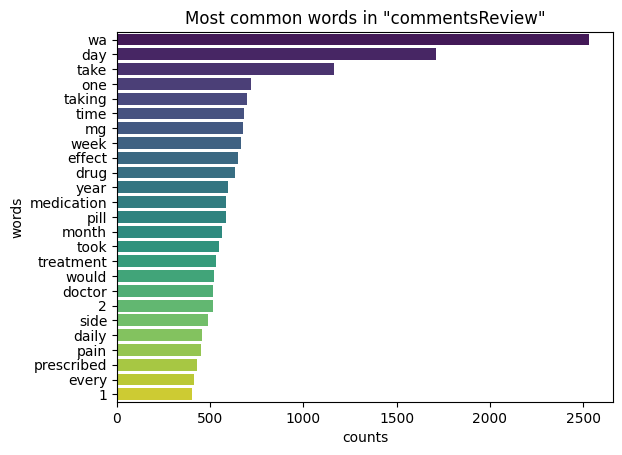

In [ ]:
sns.barplot(y='words', x='counts', data=mostC, palette='viridis')
plt.title('Most common words in "commentsReview"')
plt.show()

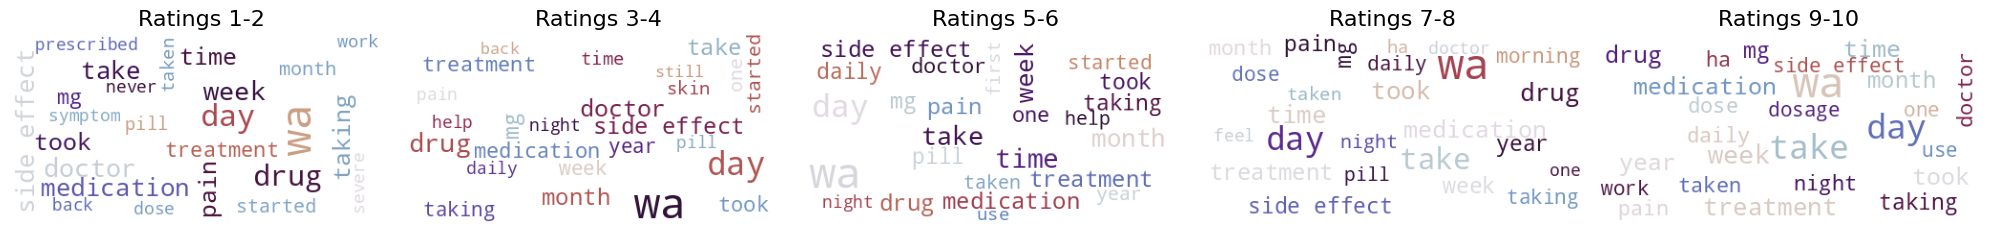

In [ ]:
rating_pairs = [(1, 2), (3, 4), (5, 6), (7, 8), (9, 10)]

fig, axes = plt.subplots(1, 5, figsize=(20, 5), sharex=True, sharey=True)

for j, ax in enumerate(axes.flatten()):
    lower_rating, upper_rating = rating_pairs[j]
    data_ratings = trainset_df[trainset_df['rating'].isin([lower_rating, upper_rating])]

    corpus_ratings = [token for doc in data_ratings['commentsReviewPreprocess'] for token in doc]
    counts = nltk.FreqDist(corpus_ratings)

    cloud = WordCloud(max_font_size=45, max_words=25, background_color="white", colormap='twilight').generate(' '.join(corpus_ratings))
    ax.imshow(cloud)
    ax.set_title(f'Ratings {lower_rating}-{upper_rating}', fontdict=dict(size=16))
    ax.axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()


### Step 2 : Text vectorization

#### Dictionary Creation + Cleaning

In [ ]:
from gensim.corpora import Dictionary

In [ ]:
def clean_tokens(clean_review_n_gram):
    corpus = clean_review_n_gram.to_numpy() # We load the "benefitsReview" preprocessed

    # Create dictionary of all the tokens in the corpus and sort alphabetically
    D = Dictionary(clean_review_n_gram)
    n_tokens = len(D)

    """print('The dictionary contains', n_tokens, 'terms')
    print('First terms in the dictionary:')
    for n in range(10):
        print(str(n), ':', D[n])"""

    no_below = 4 # Minimum number of documents to keep a term in the dictionary
    no_above = 0.80 # Maximum proportion of documents in which a term can appear to be kept in the dictionary

    D.filter_extremes(no_below=no_below, no_above=no_above)
    n_tokens = len(D)
    #print('The dictionary contains', n_tokens, 'terms')

    # We add the new reviews preprocessed and reduced in the dataframe
    corpus_sent = []
    for sent in corpus:
        aux = [token for token in sent if token in D.token2id.keys()] # We add only tokens that were keep in the dictionary
        corpus_sent.append(aux)

    # For each token in the dictionary count the number of docs that contain this token
    df_token_ndocs = pd.DataFrame({"token":[D[i] for i in range(len(D))], "ndocs":[D.dfs[i] for i in range(len(D))]})

    df_token_ndocs_sort = df_token_ndocs.sort_values("ndocs") # We sort each token by the number of documents that contain it
    #print("Number of token that appears only one time : "+str(len(df_token_ndocs_sort[df_token_ndocs_sort["ndocs"]==1])))

    df_token_ndocs_clean = df_token_ndocs_sort.drop(df_token_ndocs_sort[df_token_ndocs_sort["ndocs"]==1].index) # We remove all tokens that appear only in 1 document
    #print(f"One of the less common token : {df_token_ndocs_clean.loc[0, 'token'], df_token_ndocs_clean.loc[0, 'ndocs']}")
    #print(f"One of the most common token : {df_token_ndocs_clean.iloc[-1, 0], df_token_ndocs_clean.iloc[-1, 1]}")

    return corpus_sent, df_token_ndocs_clean, D

In [ ]:
trainset_df["benefitsReviewPreprocess"], train_benefit_token_ndocs_clean, train_benefit_D = clean_tokens(trainset_df["benefitsReviewPreprocess"])
trainset_df["sideEffectsReviewPreprocess"], train_side_token_ndocs_clean, train_side_D = clean_tokens(trainset_df["sideEffectsReviewPreprocess"])
trainset_df["commentsReviewPreprocess"], train_comments_token_ndocs_clean, train_comments_D = clean_tokens(trainset_df["commentsReviewPreprocess"])
trainset_df.head()

Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3        3947          prilosec       3  Marginally Effective   
4        1951            lyrica       2  Marginally Effective   

           sideEffects                               condition  \
0    Mild Side Effects  management of congestive heart failure   
1  Severe Side Effects                        birth prevention   
2      No Side Effects                        menstrual cramps   
3    Mild Side Effects                             acid reflux   
4  Severe Side Effects                            fibromyalgia   

                                      benefitsReview  \
0  slowed the progression of left ventricular dys...   
1  Although this type of birth control has more c...   
2  I was used to having cramps so badly that they...   
3  The acid reflux went away for a few months aft...   
4  I think that the Lyrica was starting to help w...   

                                   sideEffectsReview  \
0  cough, hypotension , proteinuria, impotence , ...   
1  Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...   
2         Heavier bleeding and clotting than normal.   
3  Constipation, dry mouth and some mild dizzines...   
4  I felt extremely drugged and dopey.  Could not...   

                                      commentsReview  \
0  monitor blood pressure , weight and asses for ...   
1  I Hate This Birth Control, I Would Not Suggest...   
2  I took 2 pills at the onset of my menstrual cr...   
3  I was given Prilosec prescription at a dose of...   
4                                          See above   

                            benefitsReviewPreprocess  \
0  [slowed, progression, left, heart, failure, al...   
1  [although, type, birth, control, ha, pro, help...   
2  [wa, used, cramp, badly, would, leave, bed, le...   
3  [acid, reflux, went, away, month, day, drug, h...   
4  [think, lyrica, wa, starting, help, pain, side...   

                         sideEffectsReviewPreprocess  \
0  [cough, impotence, tachycardia, taste, disturb...   
1  [heavy, cycle, cramp, hot, flash, fatigue, lon...   
2                                 [bleeding, normal]   
3  [constipation, dry, mouth, mild, dizziness, wo...   
4  [felt, extremely, drugged, dopey, could, drive...   

                            commentsReviewPreprocess  
0          [monitor, blood, pressure, weight, fluid]  
1     [hate, birth, control, would, suggest, anyone]  
2  [took, 2, pill, onset, menstrual, cramp, every...  
3  [wa, given, prilosec, prescription, dose, per,...  
4                                              [see]

In [ ]:
testset_df["benefitsReviewPreprocess"], test_benefit_token_ndocs_clean, test_benefit_D = clean_tokens(testset_df["benefitsReviewPreprocess"])
testset_df["sideEffectsReviewPreprocess"], test_side_token_ndocs_clean, test_side_D = clean_tokens(testset_df["sideEffectsReviewPreprocess"])
testset_df["commentsReviewPreprocess"], test_comments_token_ndocs_clean, test_comments_D = clean_tokens(testset_df["commentsReviewPreprocess"])
testset_df.head()

Unnamed: 0 urlDrugName  rating           effectiveness  \
0        1366      biaxin       9  Considerably Effective   
1        3724    lamictal       9        Highly Effective   
2        3824    depakene       4    Moderately Effective   
3         969     sarafem      10        Highly Effective   
4         696    accutane      10        Highly Effective   

           sideEffects           condition  \
0    Mild Side Effects     sinus infection   
1    Mild Side Effects    bipolar disorder   
2  Severe Side Effects    bipolar disorder   
3      No Side Effects  bi-polar / anxiety   
4    Mild Side Effects        nodular acne   

                                      benefitsReview  \
0  The antibiotic may have destroyed bacteria cau...   
1  Lamictal stabilized my serious mood swings. On...   
2  Initial benefits were comparable to the brand ...   
3  It controlls my mood swings. It helps me think...   
4  Within one week of treatment superficial acne ...   

                                   sideEffectsReview  \
0                      Some back pain, some nauseau.   
1  Drowsiness, a bit of mental numbness. If you t...   
2  Depakene has a very thin coating, which caused...   
3            I didnt really notice any side effects.   
4  Side effects included moderate to severe dry s...   

                                      commentsReview Unnamed: 9 Unnamed: 10  \
0  Took the antibiotics for 14 days. Sinus infect...        NaN         NaN   
1  Severe mood swings between hypomania and depre...        NaN         NaN   
2  Depakote was prescribed to me by a Kaiser psyc...        NaN         NaN   
3  This drug may not be for everyone but its wond...        NaN         NaN   
4  Drug was taken in gelatin tablet at 0.5 mg per...        NaN         NaN   

  Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
0         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN   
4         NaN         NaN         NaN         NaN   

                            benefitsReviewPreprocess  \
0  [antibiotic, may, bacteria, causing, sinus, in...   
1  [lamictal, stabilized, serious, mood, swing, o...   
2  [initial, benefit, drug, taking, several, mont...   
3  [mood, swing, help, think, live, life, life, e...   
4  [within, one, week, treatment, acne, lesion, r...   

                         sideEffectsReviewPreprocess  \
0                                       [back, pain]   
1  [drowsiness, bit, mental, numbness, take, much...   
2  [ha, caused, severe, heart, stomach, upset, di...   
3                     [really, notice, side, effect]   
4  [side, effect, included, moderate, severe, dry...   

                            commentsReviewPreprocess  
0  [took, antibiotic, 14, day, sinus, infection, ...  
1  [severe, mood, swing, depression, suicide, lam...  
2  [wa, prescribed, psychiatrist, medication, wa,...  
3  [drug, may, everyone, wonderful, make, totally...  
4  [drug, wa, taken, tablet, 0, 5, mg, per, day, ...

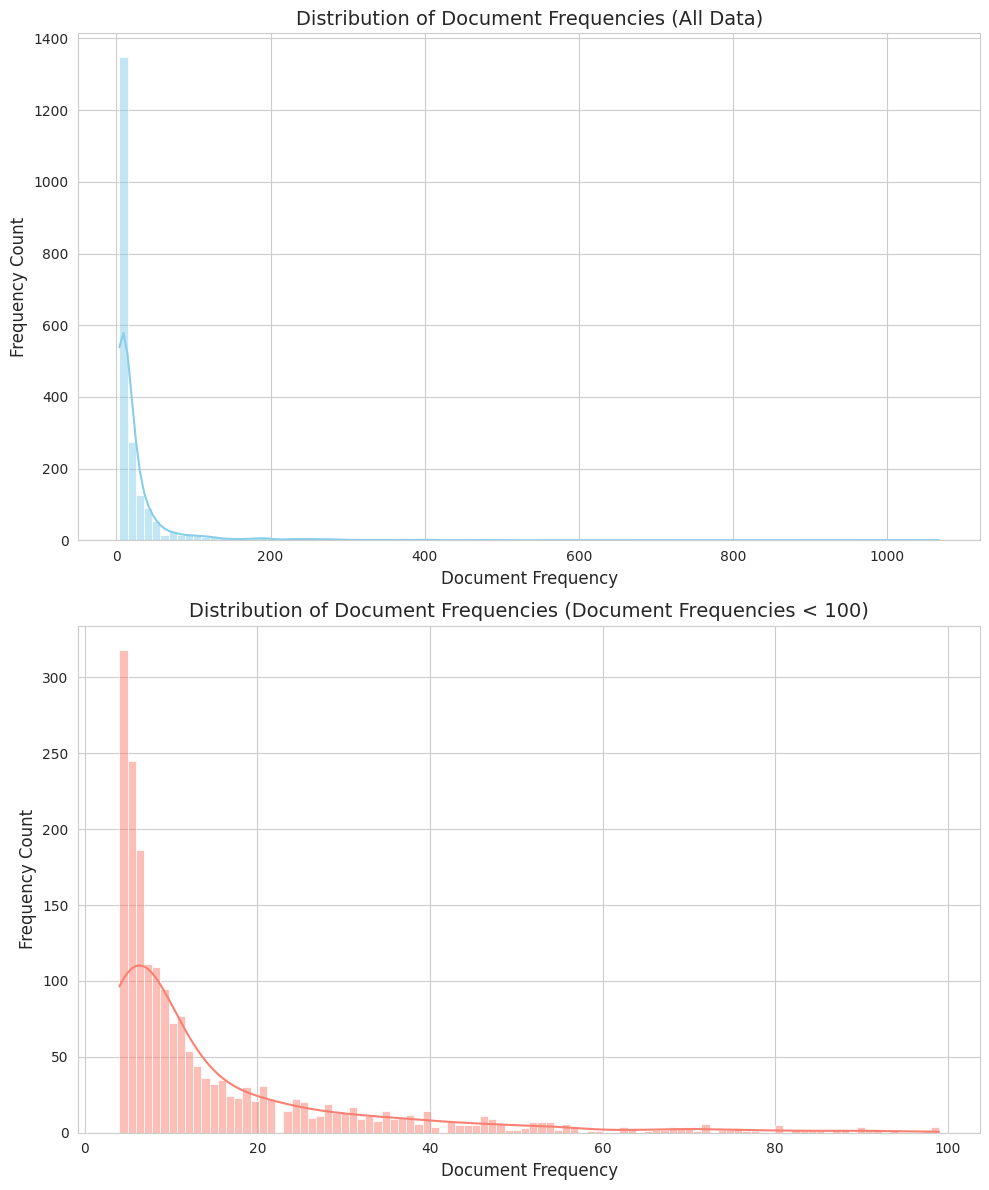

In [ ]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot histogram of all document frequencies
sns.histplot(train_benefit_token_ndocs_clean["ndocs"], bins=100, ax=axes[0], color='skyblue', kde=True)
axes[0].set_xlabel('Document Frequency', fontsize=12)
axes[0].set_ylabel('Frequency Count', fontsize=12)
axes[0].set_title('Distribution of Document Frequencies (All Data)', fontsize=14)

# Plot histogram of document frequencies less than 100
sns.histplot(train_benefit_token_ndocs_clean[train_benefit_token_ndocs_clean["ndocs"] < 100]["ndocs"], bins=100, ax=axes[1], color='salmon', kde=True)
axes[1].set_xlabel('Document Frequency', fontsize=12)
axes[1].set_ylabel('Frequency Count', fontsize=12)
axes[1].set_title('Distribution of Document Frequencies (Document Frequencies < 100)', fontsize=14)

plt.tight_layout()
plt.show()

#### Bag of Words and TF-IDF

We will first use the BoW and TF-IDF representation. To apply these methods, we will use the libraries NLTK and Gensim. First, to create either BoW or TF-IDF, we need to gather all the words of each text features in order to create the vocabulary.

In [ ]:
from gensim.models import TfidfModel

In [ ]:
full_corpus = pd.concat([trainset_df["benefitsReviewPreprocess"], trainset_df["sideEffectsReviewPreprocess"], trainset_df["commentsReviewPreprocess"], testset_df["benefitsReviewPreprocess"], testset_df["sideEffectsReviewPreprocess"], testset_df["commentsReviewPreprocess"]], ignore_index=True)

In [ ]:
D = Dictionary(full_corpus)

In [ ]:
def bow(clean_review_n_gram, D):
    corpus = clean_review_n_gram.to_numpy() # We load the "benefitsReview" preprocessed

    reviews_bow = [D.doc2bow(doc) for doc in corpus] # D.doc2bow() gives the sparse BoW of the doc in the corpus ex : [[(0, 1), (4, 3)], [(7, 2), (10, 1)], ...]

    """n_review = 0 # We take the review number 1000
    print('============= Review (lemmas) =============')
    print(' '.join(corpus[n_review]))

    print("\n========== Preprocess Text with cleaning ==========")
    print(trainset_df.loc[0, "benefitsReviewPreprocessReduced"])

    print('\n============= Sparse vector representation =============')
    # We use the sparse representation in order to not have to many 0 in the list [1, 0, 0, 5, 0, 0, 0, 1] => [(0, 1), (3, 5), (7, 1)], so the list can have different size
    # For token with id 13 (13 in the sorted dictionary D <=> "death" here), it appears 1 time in the review
    print(reviews_bow[n_review])

    print('\n============= Word counts for the review =============')
    print(list(map(lambda x: (D[x[0]], x[1]), reviews_bow[n_review])))"""

    return reviews_bow

Here, we create the different BoW representation of the benefit, side effect and comment features.

In [ ]:
train_benefit_bow = bow(trainset_df["benefitsReviewPreprocess"], D)
train_side_bow = bow(trainset_df["sideEffectsReviewPreprocess"], D)
train_comments_bow = bow(trainset_df["commentsReviewPreprocess"], D)

In [ ]:
test_benefit_bow = bow(testset_df["benefitsReviewPreprocess"], D)
test_side_bow = bow(testset_df["sideEffectsReviewPreprocess"], D)
test_comments_bow = bow(testset_df["commentsReviewPreprocess"], D)

In [ ]:
train_benefit_tfidf = TfidfModel(train_benefit_bow) # TF-IDF use the BoW representation of the corpus
train_side_tfidf = TfidfModel(train_side_bow) # TF-IDF use the BoW representation of the corpus
train_comments_tfidf = TfidfModel(train_comments_bow) # TF-IDF use the BoW representation of the corpus

In [ ]:
test_benefit_tfidf = TfidfModel(test_benefit_bow) # TF-IDF use the BoW representation of the corpus
test_side_tfidf = TfidfModel(test_side_bow) # TF-IDF use the BoW representation of the corpus
test_comments_tfidf = TfidfModel(test_comments_bow) # TF-IDF use the BoW representation of the corpus

#### Word2Vec

Now, we will create the Word2Vec representation with gensim. We will cross validation the parameters in order to see the range of value that give the best results.

In [ ]:
from gensim.models import Word2Vec
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Word2Vec settings
sg = [0, 1] # sg=0 : CBOW | sg=1 : Skip-Gram
size = [25, 50, 75, 100, 120] # Embedding size
window = [1, 3, 5, 10, 13, 16] # Window size

# Preprocessed text form trainset and testset
train_texts = trainset_df["benefitsReviewPreprocess"].tolist()
test_texts = testset_df["benefitsReviewPreprocess"].tolist()

# Target variable
train_target = trainset_df["rating"]
test_target = testset_df["rating"]

# Loop to find best embedding size and window size
for i in sg:
    print('\n---------------------------------------------')
    print('sg: ', i)
    for j in size:
        print()
        print('SIZE: ', j)
        for w in window:
            # Training Word2Vec model
            model_Word2Vec = Word2Vec(train_texts, sg=i, vector_size=j, window=w, min_count=1)

            # Function for creating document vectors
            def get_document_vectors(texts):
                document_vect = []
                for text in texts:
                    doc_v = [model_Word2Vec.wv[word] for word in text if word in model_Word2Vec.wv]
                    if doc_v:
                        mean_vec = np.mean(doc_v, axis=0)
                    else:
                        mean_vec = np.zeros(j)  # Vector zero in case of docs with no known words
                    document_vect.append(mean_vec)
                return np.asarray(document_vect)

            # creating document vectors for training
            train_documents = get_document_vectors(train_texts)

            # Simple logistic regression classifier
            clasf = LogisticRegression(max_iter=750)

            # cross-validation in the trainset
            cv_scores = cross_val_score(clasf, train_documents, train_target, cv=5)
            cv_mean = cv_scores.mean()

            # Training the classifier for training evaluation
            clasf.fit(train_documents, train_target)

            # creating document vectors for testing
            test_documents = get_document_vectors(test_texts)
            test_accuracy = clasf.score(test_documents, test_target)

            # Results
            print(f'Window: {w}, CV Mean Accuracy: {cv_mean}, Test Accuracy: {test_accuracy}')


---------------------------------------------
sg:  0

SIZE:  25
Window: 1, CV Mean Accuracy: 0.24074695413993608, Test Accuracy: 0.22297297297297297
Window: 3, CV Mean Accuracy: 0.24653939553981497, Test Accuracy: 0.22586872586872586
Window: 5, CV Mean Accuracy: 0.24396238822353739, Test Accuracy: 0.22683397683397682
Window: 10, CV Mean Accuracy: 0.24814711258161556, Test Accuracy: 0.22683397683397682
Window: 13, CV Mean Accuracy: 0.24814504144855049, Test Accuracy: 0.22297297297297297
Window: 16, CV Mean Accuracy: 0.24589423759002957, Test Accuracy: 0.2249034749034749

SIZE:  50
Window: 1, CV Mean Accuracy: 0.24042644629810855, Test Accuracy: 0.21814671814671815
Window: 3, CV Mean Accuracy: 0.24042644629810855, Test Accuracy: 0.21911196911196912
Window: 5, CV Mean Accuracy: 0.24106746198176365, Test Accuracy: 0.22393822393822393
Window: 10, CV Mean Accuracy: 0.24235467118173673, Test Accuracy: 0.22297297297297297
Window: 13, CV Mean Accuracy: 0.24267673237336312, Test Accuracy: 0.222

Once we have an idea about the range of value, we will use PCA to get the size of embedding that explain 99% of the varaince of a review.

In [ ]:
from sklearn.decomposition import PCA

N_feat_max = train_documents.shape[1]

my_pca = PCA(n_components=N_feat_max).fit(train_documents)
P_train = my_pca.transform(train_documents)
#P_val = my_pca.transform(X_val)
#P_test = my_pca.transform(X_test)

dim_train = P_train.shape[1]
#dim_val = P_val.shape[1]
#dim_test = P_test.shape[1]


print('Dimensions of training data are: ' + str(dim_train))
#print('Dimensions of validation data are: ' + str(dim_val))
#print('Dimensions of test data are: ' + str(dim_test))

Dimensions of training data are: 120


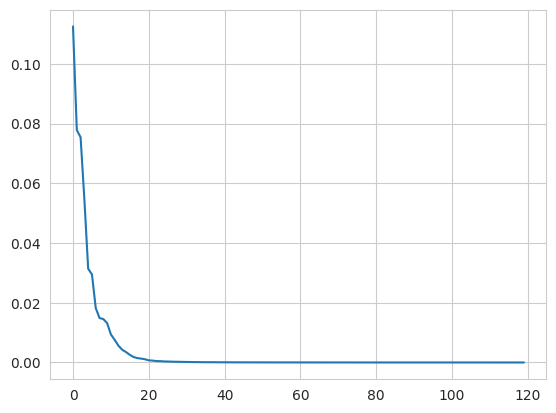

In [ ]:
# Analyze eigenvalues
eigenvalues = my_pca.explained_variance_
plt.figure()
plt.plot(eigenvalues, label='Evolution eigenvalues')
plt.show()

[21]
98.56074781214461


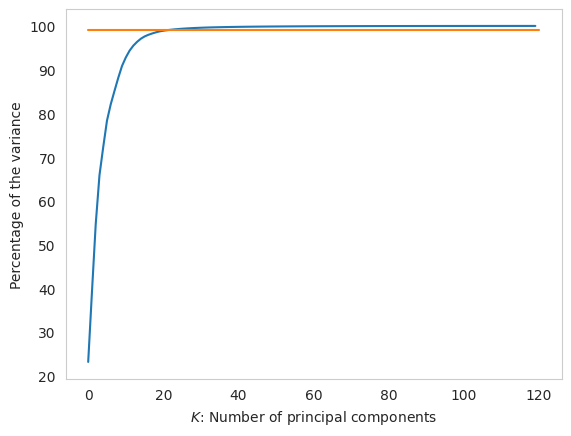

In [ ]:
# 1.- Compute an estimation of the variance in data using the training set

data_variance = np.sum(np.var(train_documents,0))

# 2.- plot the cummulative sum of the sorted eigenvalues divided by the total variance of the data
# 2.1.- express the y-axis in percentage
plt.figure()
plt.plot(100*np.cumsum(eigenvalues)/data_variance, label='Evolution eigenvalues')
print(np.argwhere(100*np.cumsum(eigenvalues)/data_variance>99)[0])
print((100*np.cumsum(eigenvalues)/data_variance)[18])
plt.plot([0, N_feat_max], [99, 99])
plt.grid()
plt.xlabel('$K$: Number of principal components')
plt.ylabel('Percentage of the variance')
plt.savefig("explained_varaince.png")

We can also see the representation in 2D space to see if there is relevant separation in the different groups of review.

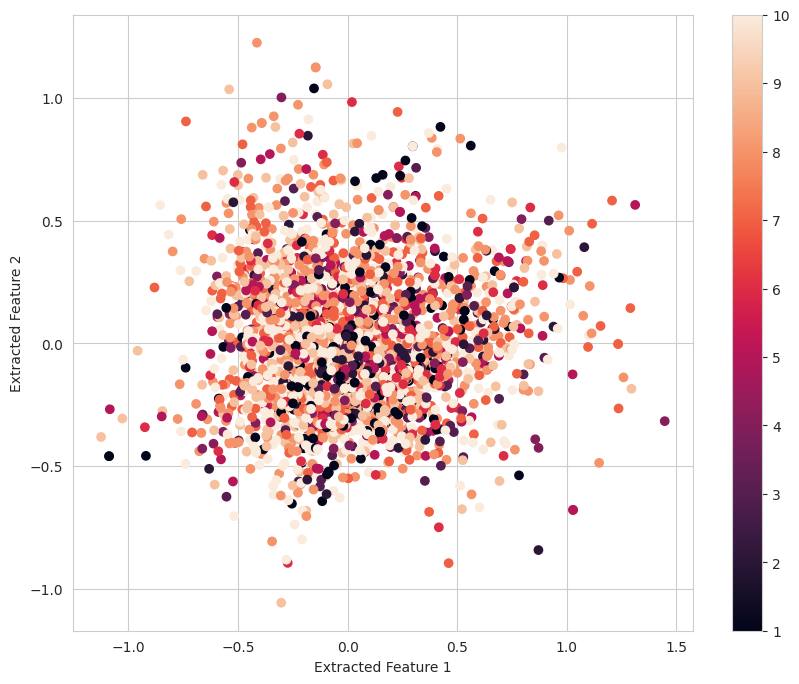

In [ ]:
X_train_pca2 = P_train[:,:2]
plt.figure(figsize=(10,8))
plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=train_target)
plt.colorbar()

plt.xlabel('Extracted Feature 1')
plt.ylabel('Extracted Feature 2')
plt.savefig("Word2Vec_2D.png")

Best Model:

**Word2Vec(trainset_df["benefitsReviewPreprocess"].tolist(), sg=1, vector_size=18, window=16, min_count=1)**

So the resulting set of vectors for training our machine learning models would be:

In [ ]:
# Final Word2Vec model
model_Word2Vec = Word2Vec(trainset_df["benefitsReviewPreprocess"], sg=1, vector_size=25, window=16, min_count=1)

document_vect_Word2Vec = []
for t in trainset_df["benefitsReviewPreprocess"]:
    doc_v_Word2Vec = []
    for word in t:
        if word in model_Word2Vec.wv:
            doc_v_Word2Vec.append(model_Word2Vec.wv[word])

    if doc_v_Word2Vec:  # Verify if there are vectors (could not be the case)
        mean_vec_Word2Vec = np.mean(doc_v_Word2Vec, axis=0)
        document_vect_Word2Vec.append(mean_vec_Word2Vec)
    else:
        # For dealing with the case when docs have no valid vectors
        document_vect_Word2Vec.append(np.zeros(model_Word2Vec.vector_size))  # Vector with zeros with vector_size

documents_Word2Vec = np.array(document_vect_Word2Vec)
print(documents_Word2Vec.shape)

(3107, 25)


#### Doc2Vec

In [ ]:
## TAKES LIKE 30 MIN TO RUN

from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare tagged docs for training
documents_train = [TaggedDocument(doc, [i]) for i, doc in enumerate(trainset_df["benefitsReviewPreprocess"])]

# model settings
vector_sizes = [50, 100, 150, 200, 250]
epoch_settings = [50, 100, 150, 200, 250]

# Iterate over different settings for Doc2Vec
for vector_size in vector_sizes:
    print('---------------------------------------------')
    print('Vector Size:', vector_size)
    for epochs in epoch_settings:
        print('------------------------')

        # Training Doc2Vec model
        model_Doc2Vec = Doc2Vec(documents_train, vector_size=vector_size, epochs=epochs)

        # Prepare vectors for training
        vectors_train = [model_Doc2Vec.dv[i] for i in range(len(trainset_df))]

        # Infer test vectors
        documents_test = [TaggedDocument(doc, [i]) for i, doc in enumerate(testset_df["benefitsReviewPreprocess"])]
        vectors_test = [model_Doc2Vec.infer_vector(doc.words) for doc in documents_test]

        # Training and testing labels
        Y_train = trainset_df["rating"]
        Y_test = testset_df["rating"]

        # Train logistic regression classifier
        clasf = LogisticRegression(max_iter=500)
        clasf.fit(vectors_train, Y_train)

        # Classifier evaluation
        accuracy = clasf.score(vectors_test, Y_test)
        print('Epochs:', epochs, '  -  Accuracy:', accuracy)

---------------------------------------------
Vector Size: 50
------------------------
Epochs: 50   -  Accuracy: 0.21235521235521235
------------------------
Epochs: 100   -  Accuracy: 0.20656370656370657
------------------------
Epochs: 150   -  Accuracy: 0.22297297297297297
------------------------
Epochs: 200   -  Accuracy: 0.21428571428571427
------------------------
Epochs: 250   -  Accuracy: 0.2133204633204633
---------------------------------------------
Vector Size: 100
------------------------
Epochs: 50   -  Accuracy: 0.2171814671814672
------------------------
Epochs: 100   -  Accuracy: 0.19787644787644787
------------------------
Epochs: 150   -  Accuracy: 0.1611969111969112
------------------------
Epochs: 200   -  Accuracy: 0.17374517374517376
------------------------
Epochs: 250   -  Accuracy: 0.19015444015444016
---------------------------------------------
Vector Size: 150
------------------------
Epochs: 50   -  Accuracy: 0.20752895752895753
------------------------
E

Best model:

**Doc2Vec(documents_train, vector_size=200, epochs=50)**

So the resulting doc vectors for training our machine learning models would be:

In [ ]:
documents_list = [TaggedDocument(document, [i]) for i, document in enumerate(trainset_df["benefitsReviewPreprocess"])]
model_Doc2Vec = Doc2Vec(documents_list, vector_size=200, epochs=50)
emb_Doc2Vec = model_Doc2Vec.dv.vectors
print(emb_Doc2Vec.shape)

(3107, 200)


#### LDA

Latent Dirichlet Allocation (LDA) is an essential statistical modeling technique frequently utilized in the fields of natural language processing and machine learning to categorize texts within documents into distinct topics. It operates under the assumption that each document is a mixture of various topics, where each topic is defined by a unique distribution of words. As an unsupervised learning model, LDA does not require pre-labeled datasets to function effectively. it.

The model’s primary function is to detect and leverage patterns of word distribution across documents to deduce probable topic compositions. This capability is especially valuable in processing and analyzing large volumes of textual data, enabling the discovery of hidden thematic structures that may not be immediately apparent, thus providing deeper insights into the content.

We will create a dictionary mapping each unique word to an ID and convert the text into a bag-of-words (BoW) format, representing each document numerically based on word counts.
After that, we will train and compare multiple LDA models over a range of topic numbers, evaluating each model's coherence score to assess the quality of each one, then the model with the highest coherence score will be selected, indicating the optimal number of topics. We then extract and review these topics to understand the main themes in the drug reviews.

It is significant to mention that before applying LDA, we will employ topic coherence in order to compute the best number of topics for our data set, where it will be based on comparing different LDA models and see the general semantic similarity between the words of a specific topic in order to maximize. In our case, we decided to study LDA models that has between 5 and 15 number of topics, we considered a range with more than enough values in order to obtain a good score.

Optimal number of topics: 6, Coherence Score: 0.4724800168484353


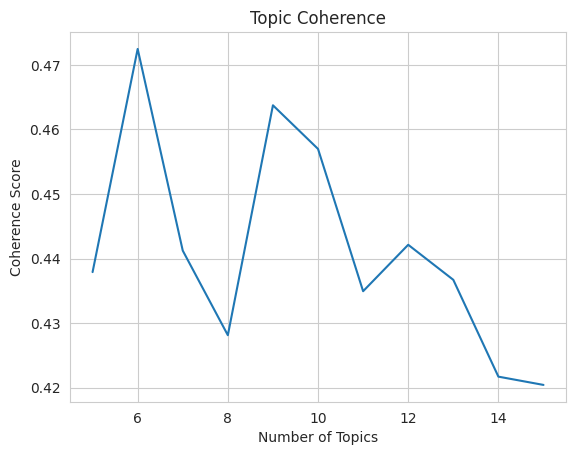

============= Extracted Themes (Topics) from Optimal Model: =============
Topic 0: 0.038*"day" + 0.032*"wa" + 0.021*"take" + 0.018*"taking" + 0.014*"pill" + 0.013*"time" + 0.012*"2" + 0.011*"week" + 0.011*"1" + 0.011*"none"
Topic 1: 0.045*"wa" + 0.018*"able" + 0.018*"sleep" + 0.015*"better" + 0.013*"feel" + 0.011*"life" + 0.011*"depression" + 0.011*"felt" + 0.010*"much" + 0.009*"anxiety"
Topic 2: 0.024*"blood" + 0.023*"wa" + 0.018*"pressure" + 0.014*"pain" + 0.013*"drug" + 0.012*"effect" + 0.010*"cholesterol" + 0.010*"lower" + 0.010*"side" + 0.009*"ha"
Topic 3: 0.050*"pain" + 0.025*"wa" + 0.023*"hair" + 0.016*"benefit" + 0.015*"drug" + 0.013*"relief" + 0.012*"treatment" + 0.011*"helped" + 0.011*"year" + 0.010*"reduced"
Topic 4: 0.024*"wa" + 0.017*"pain" + 0.013*"hot" + 0.012*"effect" + 0.011*"effective" + 0.011*"flash" + 0.010*"reduction" + 0.009*"also" + 0.008*"medication" + 0.008*"symptom"
Topic 5: 0.028*"wa" + 0.025*"skin" + 0.018*"acne" + 0.014*"treatment" + 0.011*"week" + 0.011*"i

In [ ]:
import matplotlib.pyplot as plt
from gensim.models import LdaModel
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

corpus = trainset_df["benefitsReviewPreprocess"].tolist()

# Create a dictionary and corpus
dictionary = corpora.Dictionary(corpus)
corpus_bow = [dictionary.doc2bow(doc) for doc in corpus]

# Range of possible number of topics to test
min_topics = 5
max_topics = 15
step_size = 1
topic_range = range(min_topics, max_topics + 1, step_size)

# List to add the values of the different models and associated coherence values
coherence_values = []
model_list = []

for num_topics in topic_range:
    # Create the LDA model with the corresponding number of topics
    lda_model = LdaModel(corpus=corpus_bow, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42) # We declare one random state to avoid randomness
    model_list.append(lda_model)
    # We apply a coherence model with the LDA model in order to compare with the rest models
    coherencemodel = CoherenceModel(model=lda_model, texts=corpus, dictionary=dictionary, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())

# Select the model with the highest coherence
max_coherence_idx = coherence_values.index(max(coherence_values))
optimal_model = model_list[max_coherence_idx]
optimal_num_topics = topic_range[max_coherence_idx]

# Print the optimal number of topics
print(f"Optimal number of topics: {optimal_num_topics}, Coherence Score: {max(coherence_values)}")

# Plotting
plt.plot(topic_range, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Topic Coherence")
plt.show()

# Using the optimal model, we can now print topics
print("============= Extracted Themes (Topics) from Optimal Model: =============")
for idx, topic in optimal_model.show_topics(formatted=True, num_topics=optimal_num_topics, num_words=10):
    print(f"Topic {idx}: {topic}")

# Extract and print vector representations for documents
document_vectors = [optimal_model[doc] for doc in corpus_bow]
print('\n ============= Vector Representations =============')
for i, doc_vector in enumerate(document_vectors):
    if i < 5:  # Print only the first 5 document vectors
        print(f"\nVector Representation of Document {i + 1}:")
        for topic_no, prop_topic in doc_vector:
            print(f"Topic {topic_no}: {prop_topic:.4f}", end=" ")
        print()



Firstly, by the first graph shown we can identify that the model with the most optimal number of topics were the LDA model with 6 topics, with increased the topic coherence to 0.47248, that if we compare to the rest of the models, we can see that the coherence score were decreasing as the number of topics increased. For all these reasons, we decided that 6 is going to be the number of topics with which we are going to develop our LDA model.

Through the analysis of extracted topics using LDA, we observed that each topic correlates with specific keywords that help in deducing the main subject matter. For example, one topic might be closely associated with terms like "migraine," "pressure," or "pain," suggesting its relevance to headaches. Conversely, another topic could be linked with words such as "skin," "acne," or "treatment," indicating a focus on skin-related issues. This method allows us to derive insightful information about the themes present in the dataset.

Additionally, we analyzed the vector representations for the first five documents, which illustrate the influence of each topic on a particular document. This analysis revealed that some topics are significantly prevalent in certain documents, while others are less so. In some cases, one or two topics almost entirely explains the content of a document. It is relevant to mention that in some documents, there is not represent the six different topics, the reason of this is because the impact of those topics can be considered insignificant to be shown.

Moreover, our model testing indicated that the optimal number of topics, based on the highest coherence value, is six. The coherence score graph demonstrated that this point represents the peak of topic coherence, suggesting that it is the most effective number of topics for our LDA model. This objective metric was crucial in determining the recommended number of topics, thereby ensuring the robustness and relevance of our LDA model in analyzing drug review texts.

#### Graph Visualization of the data with LDA

In [ ]:
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Create an interactive visualization of the LDA model
lda_vis_data = gensimvis.prepare(optimal_model, corpus_bow, dictionary)
pyLDAvis.display(lda_vis_data)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.9 MB/s eta 0:00:00


We can see that from the graph above it is represented a two-dimensional plot displaying all the topics as bubbles scattered across the plane. Each bubble represents a topic, and the size of the bubble indicates the prevalence of the topic in the dataset. Topics that are closer together in this space are more similar in terms of their keyword composition, suggesting overlapping or related thematic content. Conversely, topics that are further apart have less in common.
When we select a specific topic by clicking on one of the bubbles, a bar chart will appear to the right of the bubble plot. This chart displays the terms that are most relevant to the selected topic. We can also adjust the relevance term (lambda) which is used in order to obtain a balance between term frequency within a topic and the term’s exclusivity to that topic.

When observing the output of the interactive LDA visualization, especially noting the proximity of topics 1 and 4, where topic 4 appears within the bubble of topic 1, it indicates a high degree of similarity between these two topics in terms of their keyword compositions, probably the main reasons for this case would be the significant similarity between this two topics, probably sharing several words between them, however, granularity could be another factor that is producing this event.

## Task 2. OUR MODELS

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.svm import SVC, SVR
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_regression
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.preprocessing import StandardScaler

from gensim.models import Word2Vec, LdaModel
from gensim import corpora

### Classification

The first algorithm we will try is to classify the reviews per $\textit{effectiveness}$. We will try to see which type of review is the best to predict the effectiveness of a drug. We thought that it could be a real problem in the case of a new developed drug, where we only have reviews of the testing part. So, in order to achieve this task, we will proceed by cross validation to get the best model for each type of review : \textit{benefitsReview}, $\textit{sideEffectsReview}$ and $\textit{commentsReview}$.  
To make a classification, we have multiple type of model. For our purpose, we will try with :
- KNN : to see if a simple model can reach good performances
- SVC : to check whether a more complex one can increase the performances

First, we will test with large values for parameters. In fact, for the SVC, we cross validate the parameters $C$ by using logarithm scale between $10^0$ and $10^5$.
For the KNN, we will cross validate the number of neighbors $n\_neighbors$ between 1 and 10. Then, we will take $C$ between 0.1 and 1 for the SVC and search around 10 neighbors for KNN, since the accuracy seams to increase in this range.

In [ ]:
# Custom transformer for Word2Vec adapted to work under scikit-learn structure
class MeanEmbeddingVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, dim=18, window=16):
        self.w2v = None # In order to stock the w2v representation
        self.dim = dim  # Dimension of embeddings
        self.window = window # Dimension of the window

    def fit(self, X, y=None):
        # Split the documents into words for training Word2Vec
        sentences = [s.split() for s in X]
        # Train the Word2Vec model on the split sentences
        self.w2v = Word2Vec(sentences, sg=1, vector_size=self.dim, window=self.window, min_count=1, workers=4) # We use by default Skip-grame
        return self

    def transform(self, X):
        # Convert texts to mean embedding vectors
        return np.array([
            # For each text, compute the mean of the embeddings of the words in the text
            np.mean([self.w2v.wv[w] for w in words if w in self.w2v.wv]
                    or [np.zeros(self.dim)], axis=0)
            for words in [s.split() for s in X]
        ])

We have applied the Word2Vec embeddings through the MeanEmbeddingVectorizer, a custom transformer adapted for the scikit-learn architecture. This method involves first training a Word2Vec model on text data to create semantic-rich word vectors, then transforming each document into a single vector by calculating the mean of its word vectors. This approach not only reduces the dimensionality of data, making it more manageable but also speeds up processing by simplifying the data structure to a fixed-size dense vector per document. The MeanEmbeddingVectorizer seamlessly integrates with scikit-learn pipelines, allowing for straightforward implementation in our regression analysis workflow, making it a highly efficient and effective choice for our predictive modeling needs.

In [ ]:
# Custom transformer for LDA adapted to work under scikit-learn structure
class LDAEmbeddingVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, num_topics=6, passes=10):
        self.num_topics = num_topics
        self.passes = passes
        self.dictionary = None
        self.lda = None

    def fit(self, X, y=None):
        texts = [doc.split() for doc in X]
        self.dictionary = corpora.Dictionary(texts)
        corpus = [self.dictionary.doc2bow(text) for text in texts]
        self.lda = LdaModel(corpus=corpus, id2word=self.dictionary, num_topics=self.num_topics, passes=self.passes, random_state=42, minimum_probability=0.0)
        return self

    def transform(self, X):
        texts = [doc.split() for doc in X]
        corpus = [self.dictionary.doc2bow(text) for text in texts]
        # Ensuring consistent output by filling zero for absent topics
        matrix = np.zeros((len(texts), self.num_topics))
        for i, doc_bow in enumerate(corpus):
            for topic, prob in self.lda.get_document_topics(doc_bow, minimum_probability=0.0):
                matrix[i, topic] = prob
        return matrix

#### Configuration

Now, we will define the main vectorizers and models that we will cross validate to choose the best one.

In [ ]:
# Define different document vectorization techniques
vectorizers = [
    ("Bag-of-Words", CountVectorizer()),
    ("TF-IDF", TfidfVectorizer()),
    ("Word2Vec", MeanEmbeddingVectorizer()),
    ("LDA", LDAEmbeddingVectorizer())
]

# Define classification models
models = [
    ("SVC", SVC()),
    ("KNN", KNeighborsClassifier())
]

In [ ]:
# Define hyperparameter grids for each model
param_grid_svc = {
    'model__C': np.linspace(0.1, 1, num=10),
    'model__gamma': ['scale'],
    'model__kernel': ['rbf']
}

param_grid_knn = {
    'model__n_neighbors': np.linspace(8, 15, num=7).astype(int)
}

In [ ]:
# Create a list of model and vectorizer configurations
configurations = []
for model_name, model in models:
    if model_name == "SVC":
        param_grid = param_grid_svc
    elif model_name == "KNN":
        param_grid = param_grid_knn

    for vectorizer_name, vectorizer in vectorizers:
        configuration = {
            'model_name': model_name,
            'vectorizer_name': vectorizer_name,
            'model': model,
            'vectorizer': vectorizer,
            'param_grid': param_grid
        }
        configurations.append(configuration)

In [ ]:
configurations # All the configurations that will be tested

[{'model_name': 'SVC',
  'vectorizer_name': 'Bag-of-Words',
  'model': SVC(),
  'vectorizer': CountVectorizer(),
  'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
   'model__gamma': ['scale'],
   'model__kernel': ['rbf']}},
 {'model_name': 'SVC',
  'vectorizer_name': 'TF-IDF',
  'model': SVC(),
  'vectorizer': TfidfVectorizer(),
  'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
   'model__gamma': ['scale'],
   'model__kernel': ['rbf']}},
 {'model_name': 'SVC',
  'vectorizer_name': 'Word2Vec',
  'model': SVC(),
  'vectorizer': MeanEmbeddingVectorizer(),
  'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
   'model__gamma': ['scale'],
   'model__kernel': ['rbf']}},
 {'model_name': 'SVC',
  'vectorizer_name': 'LDA',
  'model': SVC(),
  'vectorizer': LDAEmbeddingVectorizer(),
  'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
   'model__gamma'

In [ ]:
def predict_without_tuning(X_train, X_test, y_train, y_test, vectorizers, models):
    # Perform model training and evaluation
    results = []
    for model_name, model in models:
        for vectorizer_name, vectorizer in vectorizers:
            print("Model:", model_name, "// Vectorizer:", vectorizer_name)
            # Construct a pipeline with text vectorization and classification model
            pipeline = Pipeline([
                ("vectorizer", vectorizer),
                ("model", model)
            ])
            # Fit the model
            pipeline.fit(X_train, y_train)
            # Predict on the test set
            y_pred = pipeline.predict(X_test)
            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            # Calculate Accuracy score
            acc = accuracy_score(y_test, y_pred)
            results.append((model_name, vectorizer_name, rmse, acc))
    return results

In [ ]:
def predict_with_tuning(X_train, X_test, y_train, y_test, configurations):
    # Perform hyperparameter tuning using cross-validation
    results_cv = []
    for config in configurations:
        print("Model:", config)
        # Construct a pipeline consisting of text vectorization and the regression model
        pipeline = Pipeline([
            ("vectorizer", config['vectorizer']),
            ("model", config['model'])
        ])

        # Perform GridSearchCV with 5-fold cross-validation and with score metric : accuracy score
        grid_search = GridSearchCV(pipeline, param_grid=config['param_grid'], cv=5, scoring='accuracy', n_jobs=-1, verbose=2, error_score='raise')
        grid_search.fit(X_train, y_train)
        # Select the best estimator (model with the best hyperparameters)
        best_model = grid_search.best_estimator_

        # Predict ratings on the test set using the best model
        y_pred = best_model.predict(X_test)
        # Calculate Accuracy score
        acc = accuracy_score(y_test, y_pred)
        # Append the model name, vectorizer name, and RMSE to the results list
        results_cv.append((config['model_name'], config['vectorizer_name'], acc, grid_search))

    return results_cv

In [ ]:
def predict_best(X, results_cv):
    best_acc = 0  # Initialize the best RMSE with an infinite value
    best_model_config = None  # Configuration of the best model (model and vectorizer)
    best_model_instance = None  # Instance of the best model (with the best hyperparameter configuration)

    # Iterate over the results from hyperparameter tuning
    for model_name, vectorizer_name, acc, grid_search in results_cv:
        # Check if the current RMSE is better than the best RMSE recorded so far
        if acc > best_acc:
            best_acc = acc  # Update the best RMSE
            best_model_config = (model_name, vectorizer_name)
            best_model_instance = grid_search.best_estimator_

    # Print the information of the best model
    print("Best Model Configuration:", best_model_config)
    print("Best Accuracy:", best_acc)

    # Use the best model to make predictions on the test set
    y_pred = best_model_instance.predict(X)

    return y_pred

In [ ]:
def plot_acc_with_param(results_cv, SVC_name, KNN_name, df_name, save_df=True):
    plt.figure(figsize=(8, 5))
    df_score_svc = pd.DataFrame(columns=["model__C", "Bag-of-Words", "TF-IDF", "Word2Vec", "LDA"])
    df_score_knn = pd.DataFrame(columns=["model__n_neighbors", "Bag-of-Words", "TF-IDF", "Word2Vec", "LDA"])

    for i in range(len(results_cv)):
        if results_cv[i][0] == "SVC":
            x_max = param_grid_svc["model__C"][np.argmax(results_cv[i][3].cv_results_["mean_test_score"])]
            y_max = np.max(results_cv[i][3].cv_results_["mean_test_score"])
            #plt.xscale('log',base=10)
            plt.plot(param_grid_svc["model__C"], results_cv[i][3].cv_results_["mean_test_score"], label=results_cv[i][0]+" : "+results_cv[i][1])
            plt.plot(x_max, y_max, "ro", markersize=10)
            plt.xlabel("C")
            plt.ylabel("Score")
            plt.title("Accuracy score for training depending on the model / vectoriation")
            plt.legend()
            plt.savefig("./img/SVC/"+SVC_name)

            df_score_svc["model__C"] = param_grid_svc["model__C"]
            df_score_svc[results_cv[i][1]] = results_cv[i][3].cv_results_["mean_test_score"]

    if save_df:
        df_score_svc.to_csv("./dataframe/KNN/"+df_name+"_scv.csv")

    plt.figure(figsize=(8, 5))
    for i in range(len(results_cv)):
        if results_cv[i][0] == "KNN":
            x_max = param_grid_knn["model__n_neighbors"][np.argmax(results_cv[i][3].cv_results_["mean_test_score"])]
            y_max = np.max(results_cv[i][3].cv_results_["mean_test_score"])
            plt.plot(param_grid_knn["model__n_neighbors"], results_cv[i][3].cv_results_["mean_test_score"], label=results_cv[i][0]+" : "+results_cv[i][1])
            plt.plot(x_max, y_max, "ro", markersize=10)
            plt.xlabel("Number neighbors")
            plt.ylabel("Score")
            plt.title("Accuracy score for training depending on the model / vectoriation")
            plt.legend()
            plt.savefig("./img/KNN/"+KNN_name)

            df_score_knn["model__n_neighbors"] = param_grid_knn["model__n_neighbors"]
            df_score_knn[results_cv[i][1]] = results_cv[i][3].cv_results_["mean_test_score"]

    if save_df:
        df_score_knn.to_csv("./dataframe/CSV/"+df_name+"_knn.csv")

In [ ]:
def plot_residual(y_test, y_pred, name):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Scatter plot for real values vs preditions
    axes[0].scatter(y_test, y_pred, color='blue', alpha=0.5)
    axes[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
    axes[0].set_xlabel('Actual Ratings')
    axes[0].set_ylabel('Predicted Ratings')
    axes[0].set_title('Actual vs Predicted Ratings')
    axes[0].set_xticks(range(1, 11))
    axes[0].set_yticks(range(1, 11))

    # Residual plot
    residuals = y_test - y_pred
    axes[1].scatter(y_pred, residuals, color='green', alpha=0.5)
    axes[1].axhline(y=0, color='red', linestyle='-')
    axes[1].set_xlabel('Predicted Ratings')
    axes[1].set_ylabel('Residuals')
    axes[1].set_title('Residual Plot')

    plt.tight_layout()
    plt.savefig("./img/Residual/"+name)
    plt.show()

#### Performances

We define a classe `Classifier()` that will contain all the necessary to load the prepocessed data, train the models and show the results.

In [ ]:
class Classifier():
    def __init__(self, column, configurations):
        self.column = column
        self.configurations = configurations
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.results_cv = None
        self.y_pred = None

    def load(self):
        self.X_train = trainset_df[self.column].apply(' '.join)
        self.X_test = testset_df[self.column].apply(' '.join)
        self.y_train = trainset_df["effectiveness"]
        self.y_test = testset_df["effectiveness"]

    def load_multiple_column(self, X_trainset_df, X_testset_df, y_trainset_df, y_testset_df):
        self.X_train = X_trainset_df[self.column].apply(' '.join)
        self.X_test = X_testset_df[self.column].apply(' '.join)
        self.y_train = y_trainset_df
        self.y_test = y_testset_df

    def train(self):
        self.results_cv = predict_with_tuning(self.X_train, self.X_test, self.y_train, self.y_test, self.configurations)

    def plot_acc(self, column_name):
        plot_acc_with_param(self.results_cv , "Accuracy_SVC_"+column_name+".png", "Accuracy_KNN_"+column_name+".png", column_name)
        print("\n ============= Classification "+column_name+" =============")
        print("\n After Hyperparameter tuning")
        print("\nModel\t\t\tVectorizer\t\tAcc")
        for model_name, vectorizer_name, acc, _ in self.results_cv:
            print(f"{model_name.ljust(24)}{vectorizer_name.ljust(24)}{acc:.4f}")

    def predict(self):
        self.y_pred = predict_best(self.X_test, self.results_cv)

    def plot_residual(self, column_name):
        plot_residual(self.y_test, self.y_pred, "Residual_"+column_name+".png")

#### Benefit

Model: {'model_name': 'SVC', 'vectorizer_name': 'Bag-of-Words', 'model': SVC(), 'vectorizer': CountVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'TF-IDF', 'model': SVC(), 'vectorizer': TfidfVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'Word2Vec', 'model': SVC(), 'vectorizer': MeanEmbeddingVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'LDA', 'mode

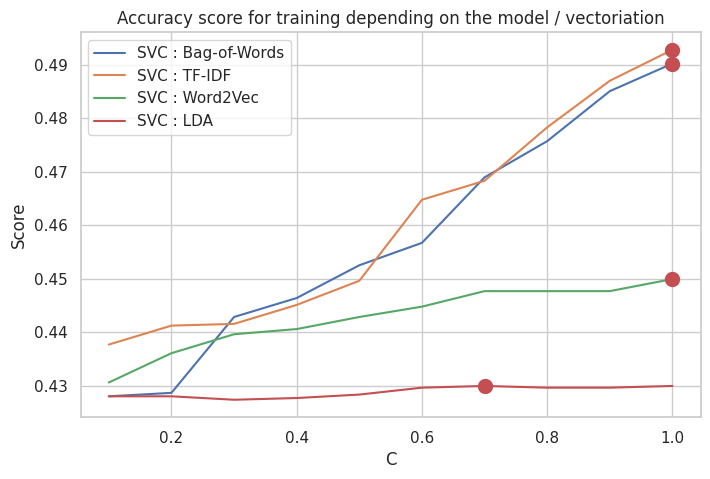

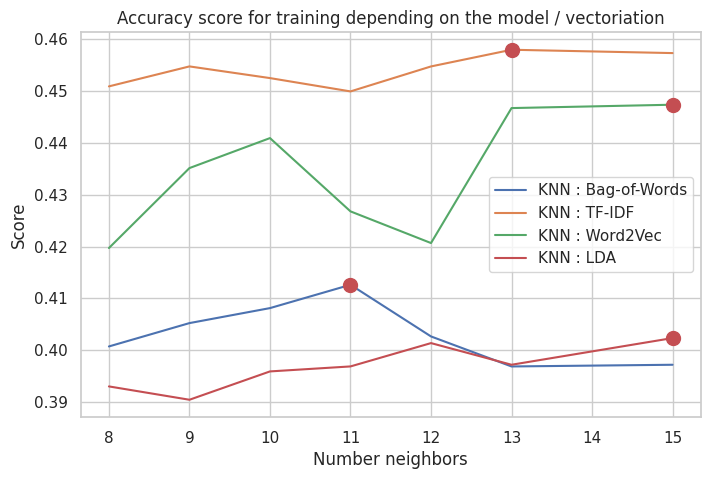

In [ ]:
classifier_benef = Classifier("benefitsReviewPreprocess", configurations)

classifier_benef.load()
classifier_benef.train()
classifier_benef.plot_acc("Benefit")
classifier_benef.predict()

#### Side Effect

Model: {'model_name': 'SVC', 'vectorizer_name': 'Bag-of-Words', 'model': SVC(), 'vectorizer': CountVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'TF-IDF', 'model': SVC(), 'vectorizer': TfidfVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'Word2Vec', 'model': SVC(), 'vectorizer': MeanEmbeddingVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'LDA', 'mode

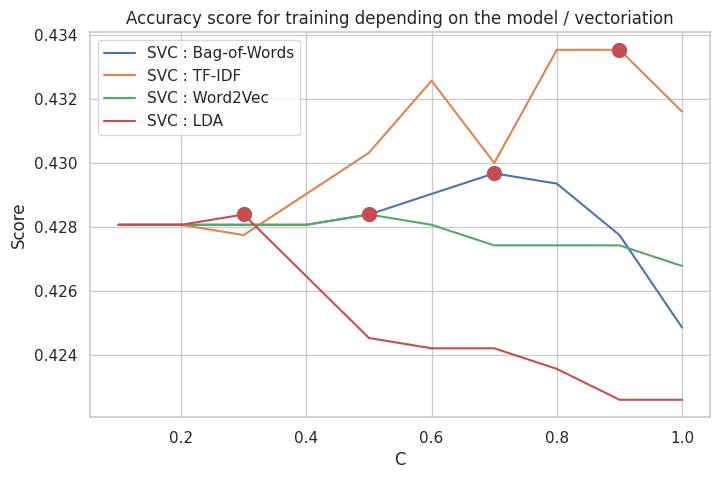

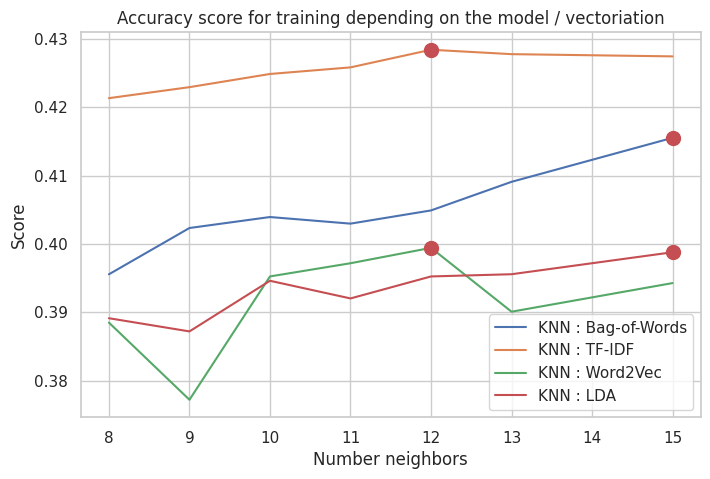

In [ ]:
classifier_side = Classifier("sideEffectsReviewPreprocess", configurations)

classifier_side.load()
classifier_side.train()
classifier_side.plot_acc("Side")
classifier_side.predict()

#### Comments

Model: {'model_name': 'SVC', 'vectorizer_name': 'Bag-of-Words', 'model': SVC(), 'vectorizer': CountVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'TF-IDF', 'model': SVC(), 'vectorizer': TfidfVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'Word2Vec', 'model': SVC(), 'vectorizer': MeanEmbeddingVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'LDA', 'mode

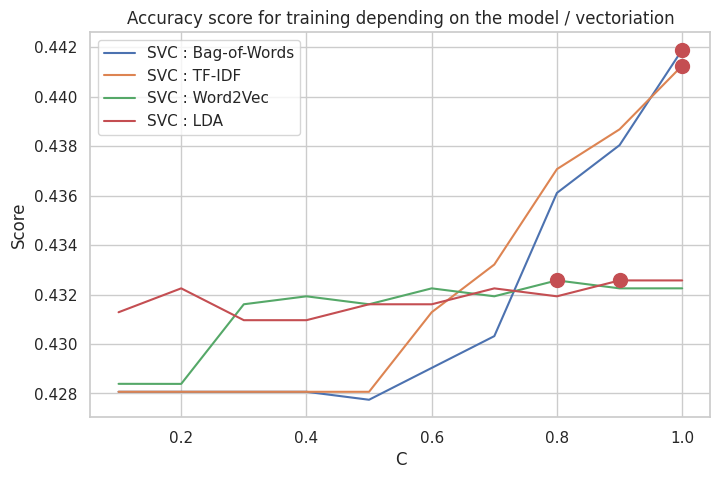

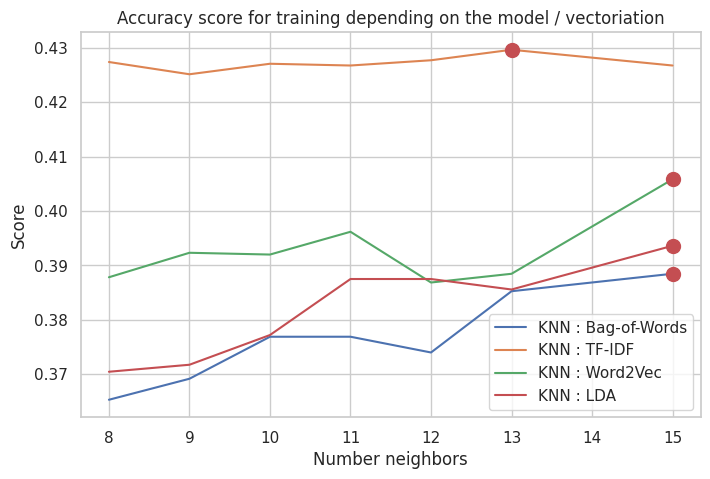

In [ ]:
classifier_comment = Classifier("commentsReviewPreprocess", configurations)

classifier_comment.load()
classifier_comment.train()
classifier_comment.plot_acc("Comment")
classifier_comment.predict()

#### Benefit + Side

In [ ]:
trainset_benef_side_df = pd.DataFrame(pd.concat([trainset_df["benefitsReviewPreprocess"], trainset_df["sideEffectsReviewPreprocess"]], ignore_index=True), columns=["benefits+sideEffects"])
testset_benef_side_df = pd.DataFrame(pd.concat([testset_df["benefitsReviewPreprocess"], testset_df["sideEffectsReviewPreprocess"]], ignore_index=True), columns=["benefits+sideEffects"])

X_train_benef_side = trainset_benef_side_df["benefits+sideEffects"].apply(' '.join)
X_test_benef_side = testset_benef_side_df["benefits+sideEffects"].apply(' '.join)

y_train = pd.concat([trainset_df["rating"], trainset_df["rating"]], ignore_index=True)
y_test = pd.concat([testset_df["rating"], testset_df["rating"]], ignore_index=True)

Model: {'model_name': 'SVC', 'vectorizer_name': 'Bag-of-Words', 'model': SVC(), 'vectorizer': CountVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'TF-IDF', 'model': SVC(), 'vectorizer': TfidfVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'Word2Vec', 'model': SVC(), 'vectorizer': MeanEmbeddingVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'LDA', 'mode

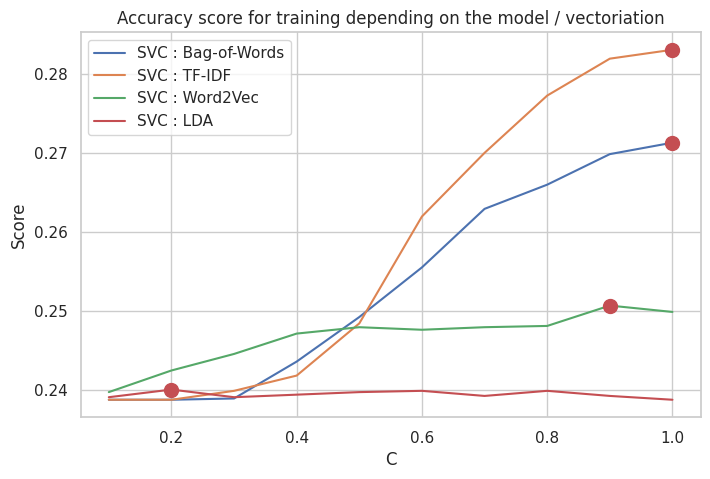

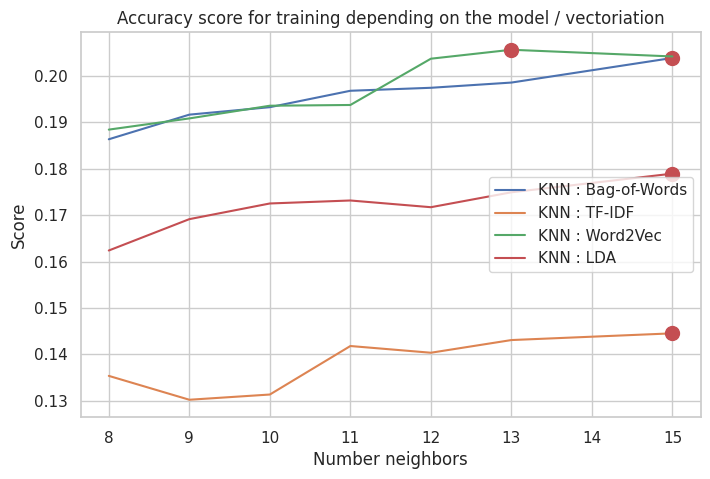

In [ ]:
classifier_benef_side = Classifier("benefits+sideEffects", configurations)

classifier_benef_side.load_multiple_column(trainset_benef_side_df, testset_benef_side_df, y_train, y_test)
classifier_benef_side.train()
classifier_benef_side.plot_acc("Benefit+Side")
classifier_benef_side.predict()

#### Benefit + Side + Comment

In [ ]:
trainset_benef_side_comment_df = pd.DataFrame(pd.concat([trainset_df["benefitsReviewPreprocess"], trainset_df["sideEffectsReviewPreprocess"], trainset_df["commentsReviewPreprocess"]], ignore_index=True), columns=["benefits+sideEffects+comments"])
testset_benef_side_comment_df = pd.DataFrame(pd.concat([testset_df["benefitsReviewPreprocess"], testset_df["sideEffectsReviewPreprocess"], testset_df["commentsReviewPreprocess"]], ignore_index=True), columns=["benefits+sideEffects+comments"])

X_train_benef_side_comment = trainset_benef_side_comment_df["benefits+sideEffects+comments"].apply(' '.join)
X_test_benef_side_comment = testset_benef_side_comment_df["benefits+sideEffects+comments"].apply(' '.join)

y_train = pd.concat([trainset_df["rating"], trainset_df["rating"], trainset_df["rating"]], ignore_index=True)
y_test = pd.concat([testset_df["rating"], testset_df["rating"], testset_df["rating"]], ignore_index=True)

Model: {'model_name': 'SVC', 'vectorizer_name': 'Bag-of-Words', 'model': SVC(), 'vectorizer': CountVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'TF-IDF', 'model': SVC(), 'vectorizer': TfidfVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'Word2Vec', 'model': SVC(), 'vectorizer': MeanEmbeddingVectorizer(), 'param_grid': {'model__C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'model__gamma': ['scale'], 'model__kernel': ['rbf']}}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Model: {'model_name': 'SVC', 'vectorizer_name': 'LDA', 'mode

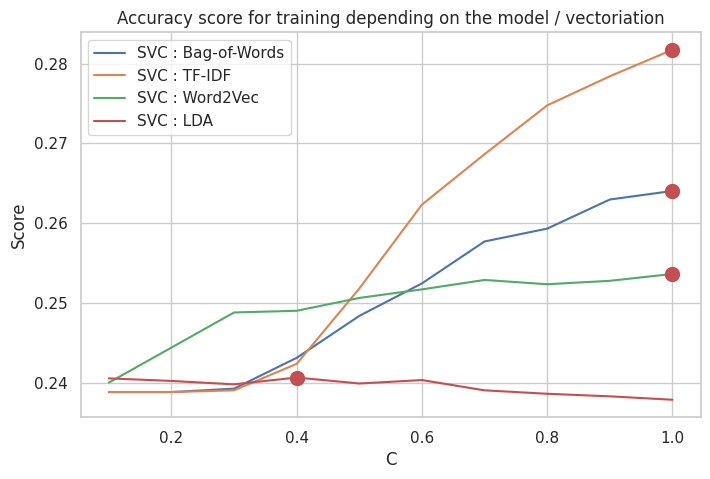

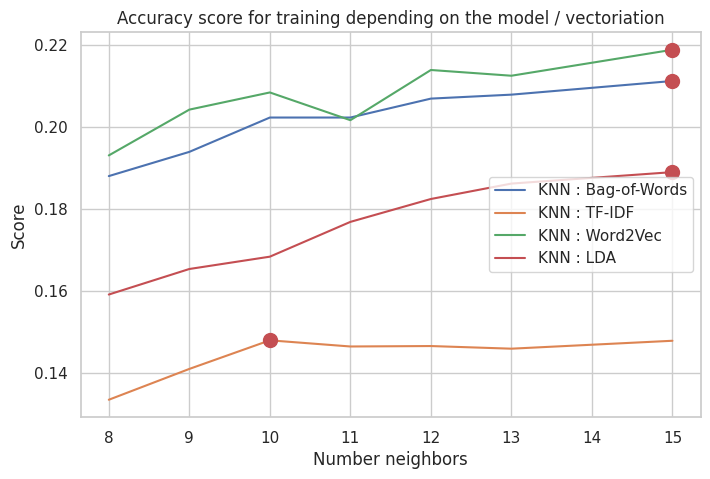

In [ ]:
classifier_benef_side_comment = Classifier("benefits+sideEffects+comments", configurations)

classifier_benef_side_comment.load_multiple_column(trainset_benef_side_comment_df, testset_benef_side_comment_df, y_train, y_test)
classifier_benef_side_comment.train()
classifier_benef_side_comment.plot_acc("benefits+sideEffects+comments")
classifier_benef_side_comment.predict()

### Regression

In the regression segment of our project, we aim to predict the "Rating" value, a numerical variable ranging from 1 to 10, based on the textual content of "benefits reviews" provided by clients. This task involves using various string variable vectorizers such as Bag-of-Words, TF-IDF, and Word2Vec. Each of these feature extraction methods has been explored during our course and is integral to our analysis, allowing us to transform unstructured text data into structured numerical formats suitable for regression models.

Initially, we will conduct the regression analysis without employing cross-validation to establish a baseline for our predictions. Subsequently, we will integrate a cross-validation methodology to assess its impact on the model's performance. Cross-validation is expected to enhance the reliability and generalizability of our results by mitigating overfitting and providing a more robust evaluation of the model's effectiveness across different subsets of the dataset. For the predictive models, we have choosen: Linear Regression, Random Forest Regressor, Gradient Boosting and Support Vector Regressor (SVR)


After training these models using the different vectorizers, we will compute the Root Mean Square Error (RMSE) for each configuration to identify the approach that minimizes prediction errors. This metric will help in determining the most effective model and feature extraction technique.

Finally, we will visualize several aspects of our findings. These will include the performance of the most optimal model, the influence of different hyperparameters on RMSE, and other relevant analyses.

#### Configurations
In this section we will establish our vectorizers and regression models. Now we will explain briefly each model:
- Linear Regression: Often the first choice due to its simplicity and efficiency in many scenarios, despite its limitations in handling non-linear relationships.
- Random Forest Regressor: This is a more complex model that operates well with non-linear data. It works by building multiple decision trees and merging their outputs, which can be computationally intensive but often yields high accuracy.
- Gradient Boosting: A robust and powerful ensemble technique that builds trees sequentially, with each new tree correcting errors made by the previously built trees. It's highly effective for regression problems due to its predictive power and ability to model complex nonlinear relationships.
- Support Vector Regression (SVR): SVR uses the same principles as SVM for classification but supports a continuous output variable. It is particularly useful for finding a hyperplane in a high-dimensional space to fit the data. The model is effective in capturing complex relationships but can be sensitive to hyperparameter settings and scaling.

As we explained before, for our vectorization techniques we will employ BoW, TF-IDF and Word2Vec, which are different feature extraction algorithms taught during the course and we consider one of the most relevant ones.

In [ ]:
# Define regression models
models = [
    ("Linear Regression", LinearRegression()),
    ("Random Forest Regression", RandomForestRegressor()),
    ("Gradient Boosting Regression", GradientBoostingRegressor()),
    ("SVR", SVR())
]

# Define different document vectorization techniques
vectorizers = [
    ("Bag-of-Words", CountVectorizer()),
    ("TF-IDF", TfidfVectorizer()),
    ("Word2Vec", MeanEmbeddingVectorizer())
]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


We plan to optimize the performance of various regression models by tuning their hyperparameters. To do this, we will set up a hyperparameter grid for each model, selecting a range of arbitrary values that cover diverse scenarios. This approach involves defining varied values for each parameter in the grid, ensuring that we thoroughly explore the potential configurations. This method will allow us to systematically test how different settings impact the models' performances, helping us to identify the optimal combination of hyperparameters that yields the best results in terms of prediction accuracy and model efficiency.

In [ ]:
# Define hyperparameter grids for each model
param_grid_rf = {
    'model__n_estimators': [50, 100, 150],
    'model__max_depth': [None, 10, 20, 30]
}
param_grid_lr = {}  # Empty grid for Linear Regression
param_grid_gb = {
    'model__n_estimators': [100, 200],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5]
}
param_grid_svr = {
    'model__C': [1, 10, 50],
    'model__gamma': ['scale', 'auto'],
    'model__kernel': ['rbf', 'linear']
}

# Create a list of model and vectorizer configurations
configurations = []
for model_name, model in models:
    if model_name == 'Random Forest Regression':
        param_grid = param_grid_rf
    elif model_name == 'Gradient Boosting Regression':
        param_grid = param_grid_gb
    elif model_name == 'SVR':
        param_grid = param_grid_svr
    else:
        param_grid = param_grid_lr

    for vectorizer_name, vectorizer in vectorizers:
        configuration = {
            'model_name': model_name,
            'vectorizer_name': vectorizer_name,
            'model': model,
            'vectorizer': vectorizer,
            'param_grid': param_grid
        }
        configurations.append(configuration)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Utile functions for visualization

We have developed a series of functions specifically designed to enhance the visualization of our analysis results. These functions are crafted to provide clear, effective visual representations that facilitate a straightforward interpretation of the outcomes. This suite of visual tools includes capabilities for displaying formatted result tables, comparing RMSE scores across models and vectorizers, visualizing the distribution of errors, and plotting actual versus predicted values.

In [ ]:
# Function to print a table of RMSE results after hyperparameter tuning
def print_rmse_table(results_cv):
    import pandas as pd
    # Convert results to DataFrame for better formatting
    df = pd.DataFrame(results_cv, columns=['Model', 'Vectorizer', 'RMSE'])
    # Displaying the RMSE results after hyperparameter tuning in a formatted table
    print("\nAfter Hyperparameter Tuning - RMSE Results:")
    print(df.to_string(index=False))

# Function to create a bar plot comparing RMSEs for different model and vectorizer combinations
def plot_rmse_results(results_cv):
    # Extract labels and RMSE values for plotting from results_cv
    labels = [f"{res[0]} ({res[1]})" for res in results_cv]  # Format: "Model (Vectorizer)"
    rmse_values = [res[2] for res in results_cv]

    # Create a bar plot to visually compare RMSEs across different model-vectorizer combinations
    plt.figure(figsize=(12, 6))
    plt.bar(labels, rmse_values, color='skyblue')
    plt.xlabel('Model and Vectorizer')
    plt.ylabel('RMSE')
    plt.title('RMSE for Different Model-Vectorizer Combinations After Tuning')
    plt.xticks(rotation=45, ha="right")  # Rotate labels to prevent overlap
    plt.tight_layout()
    plt.show()

# Function to plot the distribution of RMSE values across different vectorizers for each model
def plot_rmse_distribution_by_vectorizer(results_cv):
    df = pd.DataFrame(results_cv, columns=['Model', 'Vectorizer', 'RMSE'])
    # Pivot table to organize RMSEs by vectorizer for each model
    df_pivot = df.pivot(columns='Vectorizer', index='Model', values='RMSE')

    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 8))
    boxplot = df_pivot.boxplot(patch_artist=True, return_type='dict')  # Create box plots for visual comparison

    colors = ['skyblue', 'lightgreen', 'salmon', 'lightyellow']
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)

    plt.ylabel('RMSE', fontsize=14, fontweight='bold')
    plt.xlabel('Vectorizer', fontsize=14, fontweight='bold')
    plt.title('Distribution of RMSEs Across Vectorizers for Each Model', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine(trim=True)
    plt.tight_layout()
    plt.show()

# Function to plot actual versus predicted ratings to assess model accuracy
def plot_predictions_vs_actual(y_pred, y_test):
    # Scatter plot of actual vs predicted ratings with a line showing perfect predictions
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', edgecolor='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)  # Line for perfect predictions
    plt.xlabel('Actual Ratings', fontsize=12)
    plt.ylabel('Predicted Ratings', fontsize=12)
    plt.title('Actual vs. Predicted Ratings', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Function to plot residuals to analyze prediction errors and model performance
def plot_residuals(y_pred, y_test):
    # Calculate residuals
    residuals = y_test - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5, color='green', edgecolor='k')
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='--', linewidth=2)  # Line at zero
    plt.xlabel('Predicted Ratings', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)
    plt.title('Residuals Plot', fontsize=14)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Before cross-validation

Training our model without applying cross-validation initially allows us to establish a baseline for the Root Mean Square Error (RMSE), which is crucial for later comparisons. This initial step involves using a fixed training and test dataset to compute the RMSE, giving us a straightforward measure of the prediction of the model accuracy on unseen data.

In [ ]:
# Handling missing values by filling with an empty string
trainset_df["benefitsReviewPreprocess"].fillna("", inplace=True)
testset_df["benefitsReviewPreprocess"].fillna("", inplace=True)

# Convert lists of tokens back to single string per document
X_train = trainset_df["benefitsReviewPreprocess"].apply(' '.join)
X_test = testset_df["benefitsReviewPreprocess"].apply(' '.join)

y_train = trainset_df["rating"]
y_test = testset_df["rating"]

def predict_without_tuning(X_train, X_test, y_train, y_test, vectorizers, models):
    # Perform model training and evaluation
    results = []
    for model_name, model in models:
        for vectorizer_name, vectorizer in vectorizers:
            print("Model:", model_name, "// Vectorizer:", vectorizer_name)
            # Construct a pipeline with text vectorization and regression model
            pipeline = Pipeline([
                ("vectorizer", vectorizer),
                ("model", model)
            ])
            # Fit the model
            pipeline.fit(X_train, y_train)
            # Predict on the test set
            y_pred = pipeline.predict(X_test)
            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            results.append((model_name, vectorizer_name, rmse))
    return results

results = predict_without_tuning(X_train, X_test, y_train, y_test, vectorizers, models)


print("\nBefore Hyperparameter tuning and without SVD")
print("\nModel\t\t\t\tVectorizer\t\tRMSE")
for model_name, vectorizer_name, rmse in results:
    print(f"{model_name.ljust(30)}{vectorizer_name.ljust(27)}{rmse:.4f}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: Linear Regression // Vectorizer: Bag-of-Words
Model: Linear Regression // Vectorizer: TF-IDF
Model: Linear Regression // Vectorizer: Word2Vec
Model: Random Forest Regression // Vectorizer: Bag-of-Words
Model: Random Forest Regression // Vectorizer: TF-IDF
Model: Random Forest Regression // Vectorizer: Word2Vec
Model: Gradient Boosting Regression // Vectorizer: Bag-of-Words
Model: Gradient Boosting Regression // Vectorizer: TF-IDF
Model: Gradient Boosting Regression // Vectorizer: Word2Vec
Model: SVR // Vectorizer: Bag-of-Words
Model: SVR // Vectorizer: TF-IDF
Model: SVR // Vectorizer: Word2Vec

Before Hyperparameter tuning and without SVD

Model				Vectorizer		RMSE
Linear Regression             Bag-of-Words               5.1428
Linear Regression             TF-IDF                     3.9100
Linear Regression             Word2Vec                   2.7654
Random Forest Regression      Bag-of-Words               2.6886
Random Forest Regression      TF-IDF                     2.6728

By analyzing the results obtained, if we start talking about the Linear Regression model shows significant variance in RMSE scores based on the vectorizer used, with the highest RMSE (5.1428) observed with Bag-of-Words and the lowest (2.7654) with Word2Vec, a significant difference depending on the vectorizer used. This indicates that the Linear Regression model's performance is highly sensitive to the type of text representation, with Word2Vec providing a more effective feature representation for this model, likely due to its ability to capture semantic meanings of words better than the other two vectorizers, but it is clearly not the best model.
Random Forest and Gradient Boosting, both ensemble methods, generally perform better than the simpler Linear Regression across all vectorizers. This suggests that the ensemble methods are more robust and capable of capturing complex patterns in the data, leading to lower RMSE scores. For instance, Random Forest shows its best performance with TF-IDF (2.6728), which might indicate that this model-vectorizer combination is particularly effective as it is one the best combinations between model and vectorizer in terms of RMSE.
SVR  also displays competitive RMSE scores, particularly with Bag-of-Words (2.6183) where it outperforms other models except Gradient Boosting with TF-IDF or BoW. This might be indicative of SVR's capacity to model complex relationships in high-dimensional spaces, especially when the data is represented in a sparse format like BoW, in which we obtain the best score for the RMSE.
Across the board, TF-IDF and Bag-of-Words tends to yield better or comparable results than Word2Vec for most models. However, the exception is seen with Linear Regression where Word2Vec outperforms others, suggesting that the embedding vectorizer could be capturing contextual relationships more effectively for this particular model.

##### Employing SVD
We aim to assess the efficacy of dimensionality reduction techniques by comparing models that utilize these methods with those that do not. Considering the varied nature of our vectorizers, which include both sparse and dense outputs, we will first determine the optimal number of components for each vectorizer based on its specific characteristics. Subsequently, we will apply Truncated Singular Value Decomposition (SVD) to these optimized component settings. This approach will allow us to systematically evaluate the results and ascertain whether the implementation of such algorithms offers substantial benefits, thereby helping us decide whether to integrate these dimensionality reduction techniques into our models.

We have developed a function designed to determine the optimal SVD number of components for each vectorizer. By doing so, our goal is to refine our models and achieve the best possible performance through the application of these dimensionality reduction techniques. This strategic approach allows us to tailor the SVD settings to the specific characteristics of each vectorizer, thereby optimizing our models to minimize RMSE.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


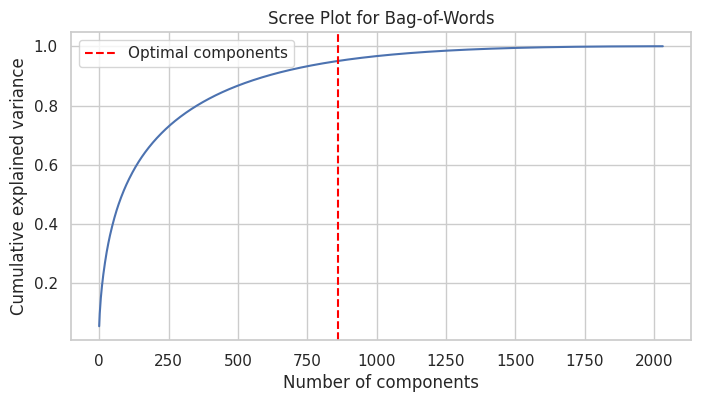

Optimal number of components for Bag-of-Words: 860


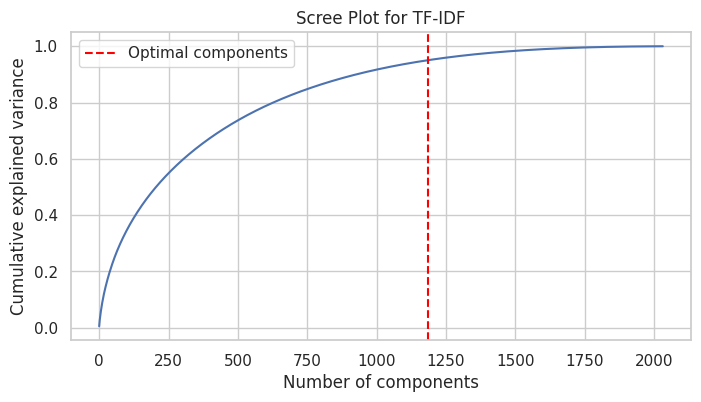

Optimal number of components for TF-IDF: 1184


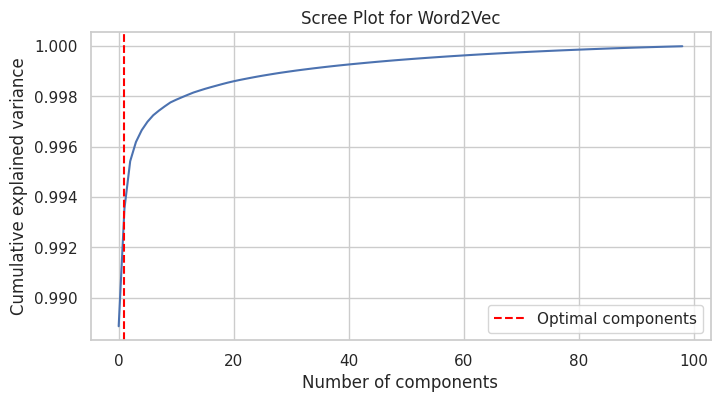

Optimal number of components for Word2Vec: 1


In [ ]:
def optimal_components_svd(data, vectorizer_tuple, variance_threshold=0.95):
    vectorizer_name, vectorizer = vectorizer_tuple
    X_vectorized = vectorizer.fit_transform(data)

    svd = TruncatedSVD(n_components=min(X_vectorized.shape) - 1)
    svd.fit(X_vectorized)

    # Calculate the cumulative explained variance ratio
    try:
        cumulative_variance = np.cumsum(svd.explained_variance_ratio_)
        components = np.where(cumulative_variance >= variance_threshold)[0][0] + 1
    except IndexError:
        components = X_vectorized.shape[1]

    plt.figure(figsize=(8, 4))
    plt.plot(np.cumsum(svd.explained_variance_ratio_))
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.axvline(x=components, linestyle='--', color='red', label='Optimal components')
    plt.title(f'Scree Plot for {vectorizer_name}')
    plt.legend()
    plt.show()

    return components

def get_optimal_components_for_all_vectorizers(data, vectorizers):
    optimal_components_dict = {}
    for vectorizer_tuple in vectorizers:
        vectorizer_name, _ = vectorizer_tuple
        n_components = optimal_components_svd(data, vectorizer_tuple, variance_threshold=0.95)
        optimal_components_dict[vectorizer_name] = n_components
        print(f"Optimal number of components for {vectorizer_name}: {n_components}")
    return optimal_components_dict



optimal_components_dict = get_optimal_components_for_all_vectorizers(X_train, vectorizers)

Those optimal number of componenents for each of the vectorizers will be employed in order to apply SVD with the objective of optimizing to the most the different models produced (without validation methodology for the moment), as we can see, depending on the vectorizer the number of components is high (like Bag-of-Words of TF-IDF) or extremely low like Word2Vec, having a single number of components, this could be an indicative that this type of vectorizer does not benefits from SVD techniques. However, we will employ SVD in every vectorizer in order to see its impact.

In [ ]:
def predict_with_svd_and_without_tuning(X_train, X_test, y_train, y_test, vectorizers, models, optimal_components_dict):
    results = []
    for model_name, model in models:
        for vectorizer_name, vectorizer in vectorizers:
            n_components = optimal_components_dict[vectorizer_name]
            print(f"Model: {model_name}, Vectorizer: {vectorizer_name}, Using SVD with {n_components} components")

            pipeline = Pipeline([
                ("vectorizer", vectorizer),
                ("decomposition", TruncatedSVD(n_components=n_components)),
                ("model", model)
            ])

            # Fit the model on the training data
            pipeline.fit(X_train, y_train)

            # Predict on the test set
            y_pred = pipeline.predict(X_test)

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            results.append((model_name, vectorizer_name, rmse))

    return results


results_svd = predict_with_svd_and_without_tuning(X_train, X_test, y_train, y_test, vectorizers, models, optimal_components_dict)

Model: Linear Regression, Vectorizer: Bag-of-Words, Using SVD with 860 components


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: Linear Regression, Vectorizer: TF-IDF, Using SVD with 1184 components
Model: Linear Regression, Vectorizer: Word2Vec, Using SVD with 1 components
Model: Random Forest Regression, Vectorizer: Bag-of-Words, Using SVD with 860 components
Model: Random Forest Regression, Vectorizer: TF-IDF, Using SVD with 1184 components
Model: Random Forest Regression, Vectorizer: Word2Vec, Using SVD with 1 components
Model: Gradient Boosting Regression, Vectorizer: Bag-of-Words, Using SVD with 860 components
Model: Gradient Boosting Regression, Vectorizer: TF-IDF, Using SVD with 1184 components
Model: Gradient Boosting Regression, Vectorizer: Word2Vec, Using SVD with 1 components
Model: SVR, Vectorizer: Bag-of-Words, Using SVD with 860 components
Model: SVR, Vectorizer: TF-IDF, Using SVD with 1184 components
Model: SVR, Vectorizer: Word2Vec, Using SVD with 1 components


In [ ]:
# Print the column headers with adjusted spacing to match value alignments
print("\nBefore Hyperparameter Tuning and Employing SVD")
# Properly name and align each column header
print(f"{'Model'.ljust(30)} {'Vectorizer'.ljust(20)} {'Num Components'.ljust(15)} {'RMSE'}")

# Loop through the results and print each row with the same formatting for consistency
for model_name, vectorizer_name, rmse in results_svd:
    # Retrieve the number of components for the current vectorizer
    components_used = optimal_components_dict[vectorizer_name]
    # Format and print each row of results
    print(f"{model_name.ljust(30)} {vectorizer_name.ljust(20)} {str(components_used).ljust(15)} RMSE = {rmse:.4f}")


Before Hyperparameter Tuning and Employing SVD
Model                          Vectorizer           Num Components  RMSE
Linear Regression              Bag-of-Words         860             RMSE = 2.8443
Linear Regression              TF-IDF               1184            RMSE = 2.7869
Linear Regression              Word2Vec             1               RMSE = 2.9848
Random Forest Regression       Bag-of-Words         860             RMSE = 2.6901
Random Forest Regression       TF-IDF               1184            RMSE = 2.6226
Random Forest Regression       Word2Vec             1               RMSE = 3.4237
Gradient Boosting Regression   Bag-of-Words         860             RMSE = 2.6269
Gradient Boosting Regression   TF-IDF               1184            RMSE = 2.6239
Gradient Boosting Regression   Word2Vec             1               RMSE = 2.8895
SVR                            Bag-of-Words         860             RMSE = 2.6095
SVR                            TF-IDF               1184   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In our analysis, we have diligently computed the optimal number of components for various vectorizers and subsequently applied Truncated SVD to evaluate the potential benefits of employing dimensionality reduction techniques. This systematic approach was intended to assess whether these techniques significantly enhance model performance and justify their computational overhead.

Models utilizing Bag-of-Words and TF-IDF vectorizations generally benefit from the application of SVD. The notable reductions in RMSE across Linear Regression models suggest that SVD effectively reduces dimensionality while retaining the most critical information. This is particularly valuable in contexts where the feature space is vast and potentially noisy, as SVD helps to focus the model on the most informative features, potentially improving accuracy and reducing the risk of overfitting.

For vectorizations that inherently produce denser, lower-dimensional outputs such as Word2Vec, the application of SVD does not consistently yield improvements. In some cases, it even leads to a slight deterioration in model performance. This suggests that the additional dimensionality reduction may strip away useful information or disrupt the intrinsic data structures that models like Random Forest or SVR rely on to make accurate predictions.


We attempted to apply Singular Value Decomposition (SVD) combinated with cross validation to vectorizers that typically benefit from this technique (applying SVD only to BoW and TF-IDF); however, the process required over 10 hours to execute, leading to numerous interruptions and other factors that made impossible to execute it eventhough it was our purpose and we produced the corresponding code to do it. Given that our analysis showed not a significant difference in output with or without SVD—except in certain outlier cases featuring exceptionally high RMSE, and in some cases as the Word2Vec, it increased the RMSE value, we opted to conduct cross-validation without incorporating SVD. Therefore, we concluded that proceeding with cross-validation without SVD was the most pragmatic approach under our current technical and computational constraints, although exploring SVD could be worthwhile with greater resources available.

#### Cross-validation
Integrating cross-validation into our model testing strategy really steps up our game by allowing us to use different subsets of our data for both training and testing. This method gives us a much fuller picture of how our model performs under various conditions, which is key to understanding just how well it works and how reliable our predictions can be. It's true that cross-validation is much more heavier in terms of computation and takes more time due to the many combinations it considers, but we expect a significant improvement in terms of RMSE that will make worth it the process.

We will employ a function in order to apply grid search cross validation and by using a pipeline containing the vectorizer and the model (with its corresponding hyperparameters) in order to obtain the results after the cross validation process.

In [ ]:
def predict_with_tuning_and_store_grid(X_train, X_test, y_train, y_test, configurations):
    # Perform hyperparameter tuning using cross-validation
    results_cv = []
    grid_objects = []
    for config in configurations:
        print("Model:", config['model_name'], "// Vectorizer:", config['vectorizer_name'])
        # Construct a pipeline consisting of text vectorization and the regression model
        pipeline = Pipeline([
            ("vectorizer", config['vectorizer']),
            ("model", config['model'])
        ])
        # Perform GridSearchCV with 5-fold cross-validation and negative mean squared error as scoring metric
        grid_search = GridSearchCV(pipeline, param_grid=config['param_grid'], cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        # Select the best estimator (model with the best hyperparameters)
        best_model = grid_search.best_estimator_
        # Predict ratings on the test set using the best model
        y_pred = best_model.predict(X_test)
        # Calculate the root mean squared error (RMSE)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results_cv.append((config['model_name'], config['vectorizer_name'], rmse))
        grid_objects.append(grid_search)

    return results_cv, grid_objects

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Regressor
We're developing a regressor class that will handle several key functions, including the initialization, loading, and training of our models using a previously defined method, predict_with_tuning_and_store_grid. This class is designed to streamline our workflow, ensuring that not only are the models trained using cross-validation to verify their robustness, but also that all details from the grid searches are systematically saved. This feature is particularly valuable as it allows us to track and analyze the performance of various hyperparameters during the training process.

In [ ]:
class Regressor():
    def __init__(self, column, configurations):
        self.column = column
        self.configurations = configurations
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.results_cv = None
        self.grid_searches = None

    def load(self, trainset_df, testset_df):
        # Join text data into a single string per document
        self.X_train = trainset_df[self.column].apply(' '.join)
        self.X_test = testset_df[self.column].apply(' '.join)
        self.y_train = trainset_df["rating"]
        self.y_test = testset_df["rating"]

    def train(self):
        # Train the model with tuning
        self.results_cv, self.grid_searches = predict_with_tuning_and_store_grid(
            self.X_train, self.X_test, self.y_train, self.y_test, self.configurations)

#### Benefit
We are now set to utilize the previously defined regressor to investigate how the "ratings" column can be modeled based on the "benefitsReviewPreprocess" column in a regression framework. We'll start by initializing the regressor with specific configurations for our regression models and the targeted feature column. Afterward, we'll load our training and test datasets into the regressor, which prepares the data by organizing features and labels accordingly. Finally, we will engage the training process to apply various regression models, optimizing them through an extensive grid search to fine-tune the hyperparameters.

We need to note that for this regression task, we've limited our predictor to only the "Benefits Reviews" column due to the extensive computational demands involved. Utilizing just this single variable, the training of the model already required more than three hours. This computational constraint has prevented us from incorporating additional columns or exploring various combinations of predictors. Such limitations were necessary to manage the practical aspects of model training within our available resources, ensuring that the task remained feasible without compromising the system's performance. Taking into consideration aspects like the different models that we employed or the use of a validation methodology it explaines the tough task that it implies.

In [ ]:
regressor_benef = Regressor("benefitsReviewPreprocess", configurations)
regressor_benef.load(trainset_df, testset_df)
regressor_benef.train()

Model: Linear Regression // Vectorizer: Bag-of-Words


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Model: Linear Regression // Vectorizer: TF-IDF
Model: Linear Regression // Vectorizer: Word2Vec
Model: Random Forest Regression // Vectorizer: Bag-of-Words
Model: Random Forest Regression // Vectorizer: TF-IDF
Model: Random Forest Regression // Vectorizer: Word2Vec
Model: Gradient Boosting Regression // Vectorizer: Bag-of-Words
Model: Gradient Boosting Regression // Vectorizer: TF-IDF
Model: Gradient Boosting Regression // Vectorizer: Word2Vec
Model: SVR // Vectorizer: Bag-of-Words
Model: SVR // Vectorizer: TF-IDF
Model: SVR // Vectorizer: Word2Vec


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



After Hyperparameter Tuning - RMSE Results:
                       Model   Vectorizer     RMSE
           Linear Regression Bag-of-Words 5.142827
           Linear Regression       TF-IDF 3.909958
           Linear Regression     Word2Vec 2.771675
    Random Forest Regression Bag-of-Words 2.648945
    Random Forest Regression       TF-IDF 2.672200
    Random Forest Regression     Word2Vec 2.756682
Gradient Boosting Regression Bag-of-Words 2.632796
Gradient Boosting Regression       TF-IDF 2.636926
Gradient Boosting Regression     Word2Vec 2.756641
                         SVR Bag-of-Words 2.557351
                         SVR       TF-IDF 2.579082
                         SVR     Word2Vec 2.948170
Minimum RMSE 2.557351193327634 obtained by Model: SVR with Vectorizer: Bag-of-Words


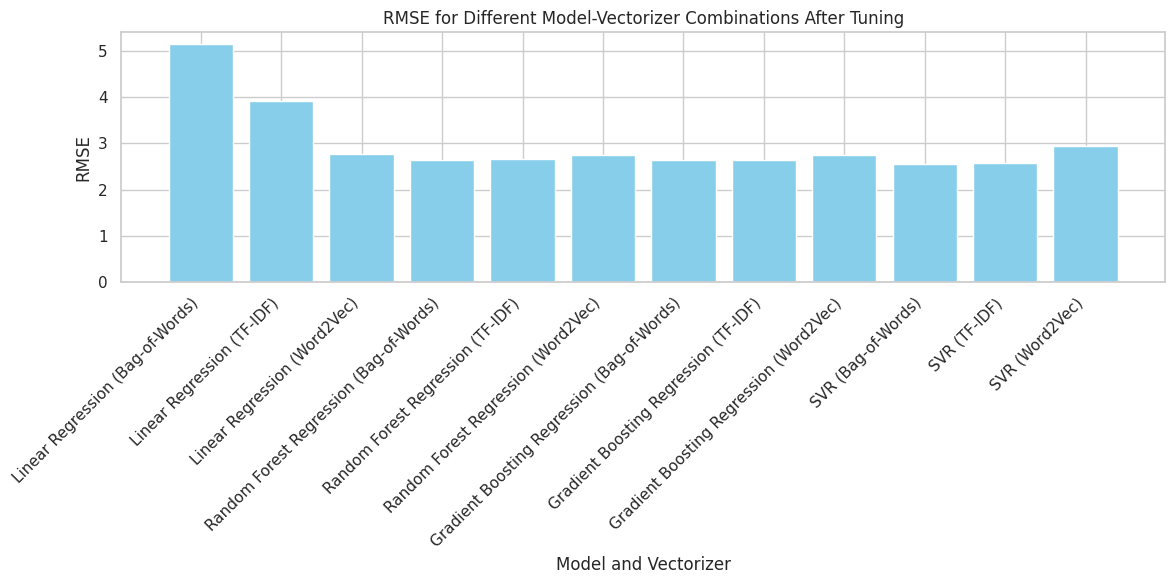

In [ ]:
# Print the results in a formatted table
print_rmse_table(regressor_benef.results_cv)

# Get the tuple with the minimum RMSE
min_result = min(regressor_benef.results_cv, key=lambda x: x[2])
min_model_name, min_vectorizer_name, min_rmse = min_result
print(f"Minimum RMSE {min_rmse} obtained by Model: {min_model_name} with Vectorizer: {min_vectorizer_name}")


plot_rmse_results(regressor_benef.results_cv)



The results from hyperparameter tuning reveal a notable variance in RMSE (Root Mean Square Error) values across different combinations of models and vectorizers. There is no reason to talk about Linear Regression at there is was not any cross validation method applied in it (as we can see the param_grid it is empty).

For the Random Forest Regression, all three vectorizers produce fairly comparable results, although Bag-of-Words (2.648945) achieves a slightly better RMSE than TF-IDF and with a higher difference than Word2Vec. The relatively small differences in RMSE scores among the vectorizers indicate that Random Forest's ensemble approach, which builds multiple decision trees to improve prediction accuracy, is robust against the variation in feature representation.

The Gradient Boosting Regression model shows its best performance with Bag-of-Words, recording the lowest RMSE of 2.632796 among its setups, but very close to the model with TF-IDF as vectorizer. This suggests that Gradient Boosting, which optimizes loss functions in a sequential manner to correct previous trees’ errors, can effectively handle sparse data formats like those generated by Bag-of-Words. The RMSE increases slightly with TF-IDF and more so with Word2Vec, indicating a potential preference for the kind of feature isolation provided by Bag-of-Words.

SVR shows the best overall performance with Bag-of-Words, achieving the lowest RMSE of 2.557351 across all models and vectorizers. The performance with TF-IDF is also strong, though slightly higher in RMSE. Word2Vec results in the highest RMSE for SVR, which might suggest that the dense vector format of Word2Vec is not as conducive to the model's optimization process, which aims to find a hyperplane in a high-dimensional space that best fits the data.

By looking at the graph we can also see in a graphical way the representation previously explained, where the best performance is obtained by the SVR with BoW as vectorizer, but it its true that most of the rest combinations are close to this one. We can see some outliers, in particular for the Linear Regression models, as we can expect it did not benefit from the cross validation process. It is also significant to notice that Word2Vec were the worst vectorizer employed for every model except when using Linear Regression.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


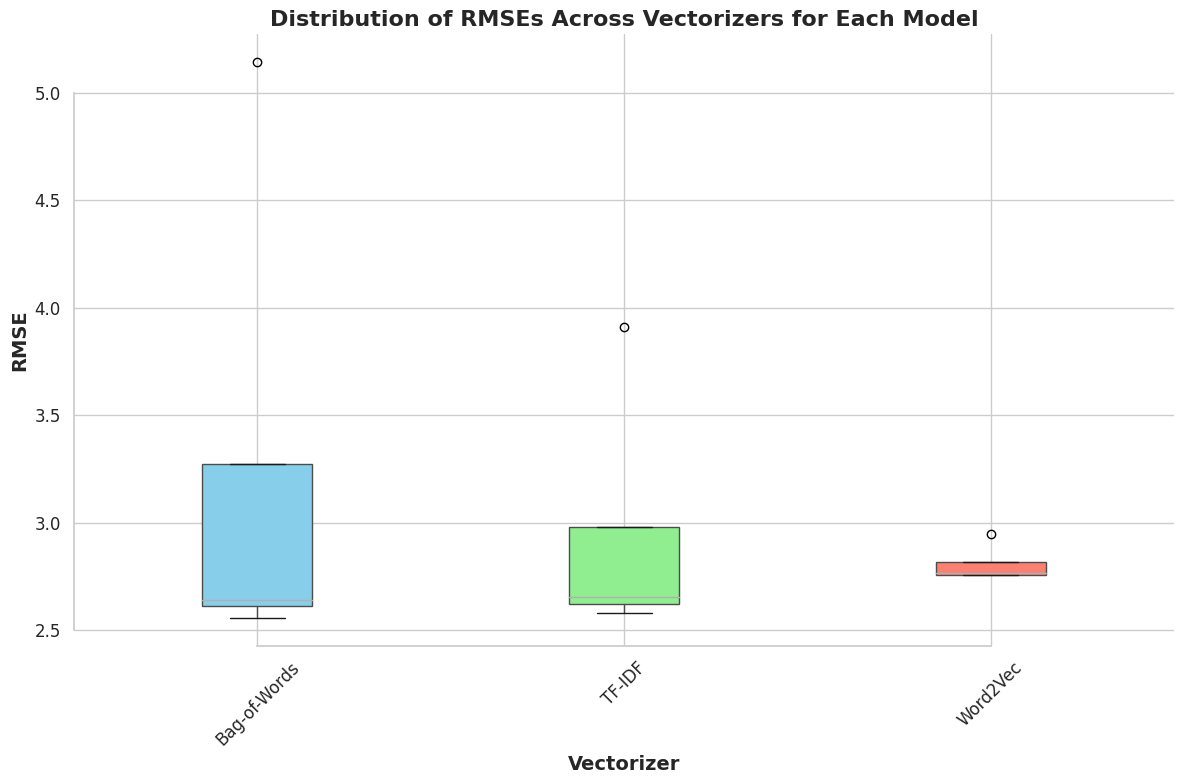

In [ ]:

plot_rmse_distribution_by_vectorizer(regressor_benef.results_cv)


Analyzing the box plot comparing different vectorizers—BoW, TF-IDF, and Word2Vec—we observe distinct differences between them. With Bag-of-Words (BoW), there is notable variability in RMSE values, ranging from the highest to the lowest across the models. Notably, an outlier is evident in the combination of Linear Regression with BoW, indicating a significantly higher RMSE. Despite this, BoW also achieves the best performance in terms of RMSE with the SVR model, registering a low score of 2.557351. This suggests that BoW can be somewhat unstable, capable of delivering both excellent and poor performances. Thus, if aiming for the possibility of achieving the best performance, BoW might be the ideal, albeit risky, choice.

Moving on to TF-IDF, the variability in RMSE values is less pronounced compared to BoW. While the worst performances are not as extreme as those seen with BoW, the best scores, such as the one from the SVR and TF-IDF combination, are comparable to the top results of BoW. This vectorizer strikes a balance, potentially offering a more consistent performance across different models without the extremes of BoW. It is optimal if the goal is to avoid high RMSEs while still achieving commendable results.

Lastly, Word2Vec shows the least variation in RMSE values among the vectorizers. It does not reach the high RMSEs observed with the other two methods (even the outlier is significantly close), nor does it achieve the lowest scores. This consistency makes Word2Vec a reliable choice if stability is prioritized over achieving the lowest possible RMSE. Word2Vec's performance indicates that it could be preferable when a uniform outcome is more critical than exceptional but potentially inconsistent results.

#### Best model

Now that we've identified the SVR with Bag-of-Words combination as the best-performing model, our next step is to pinpoint the optimal configuration for this setup. Having utilized a cross-validation methodology already, we'll delve deeper into analyzing how well this model predicts the target variable, which is the "ratings." To achieve this, we plan to plot various graphs that will help us visualize the model's predictive performance in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


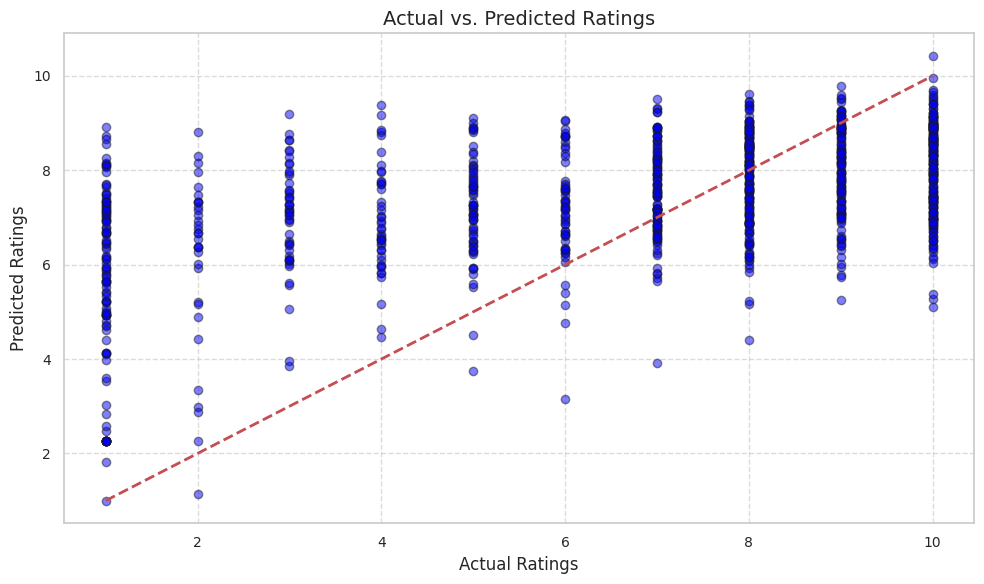

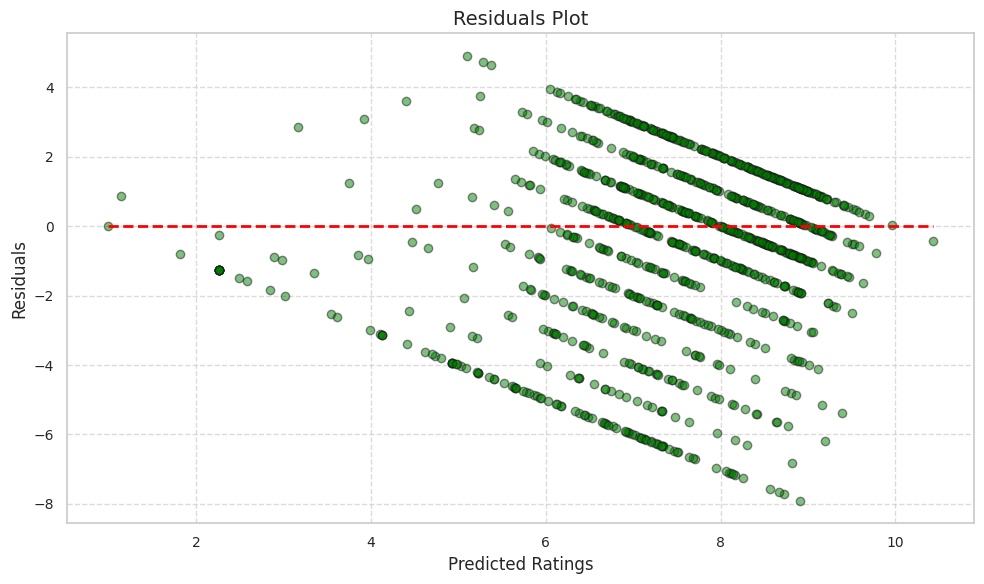

In [ ]:
# Obtain the model with the lowest RMSE
min_model_name, min_vectorizer_name, min_rmse = min(regressor_benef.results_cv, key=lambda x: x[2])[:3]

# Identify the best configuration (which is the one that coincides with the model and vectorizer that achieves the lowest RMSE)
best_config = next((config for config in configurations
                    if config['model_name'] == min_model_name and config['vectorizer_name'] == min_vectorizer_name), None)


best_model = best_config['model']
best_vectorizer = best_config['vectorizer']


pipeline_best = Pipeline([
    ("vectorizer", best_vectorizer),
    ("model", best_model)
])

# Fit the best model
pipeline_best.fit(X_train, y_train)

# Predict using the X test
y_pred = pipeline_best.predict(X_test)

# Using the previous defined functions, show graphically the predictions
plot_predictions_vs_actual(y_pred, y_test)
plot_residuals(y_pred, y_test)

From the graph, we observe that although the predictions generally mirror the structure of the actual ratings, there are numerous discrepancies and the correlation is not perfectly clear. We note that where the actual ratings are lower, the predicted values tend to be lower as well, and as the actual ratings increase, the predicted ratings also rise. However, it's evident that the model does not precisely capture the true values of the ratings across the board.

The residuals plot offers a different view but echoes a similar sentiment. While some values are close to zero, indicating accurate predictions, many others are not, showcasing substantial variances between predicted and actual values. Notably, the residuals for ratings predicted around 6 and 9 highlight significant errors. It appears that the model provides better estimates for lower actual rating values compared to the higher ones, suggesting an area where model performance could be improved to enhance overall prediction accuracy.

#### Hyperparameter impact on RMSE

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Plotting for Linear Regression using Bag-of-Words
No hyperparameters to plot for Linear Regression.
Plotting for Linear Regression using TF-IDF
No hyperparameters to plot for Linear Regression.
Plotting for Linear Regression using Word2Vec
No hyperparameters to plot for Linear Regression.
Plotting for Random Forest Regression using Bag-of-Words


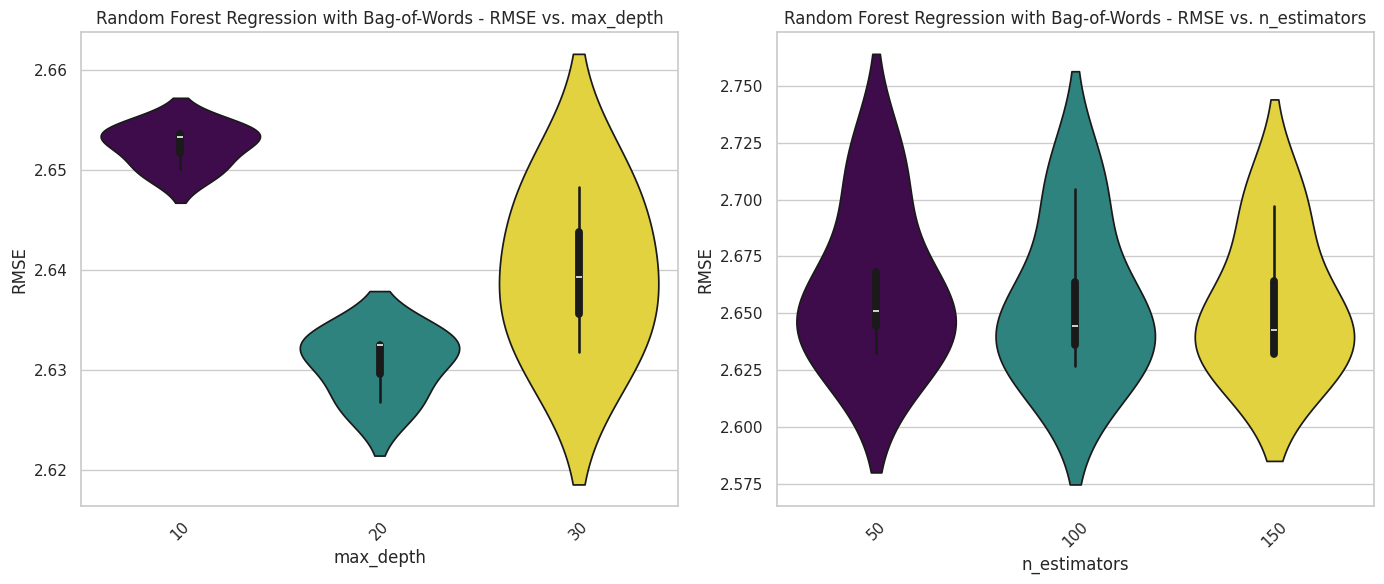

Plotting for Random Forest Regression using TF-IDF


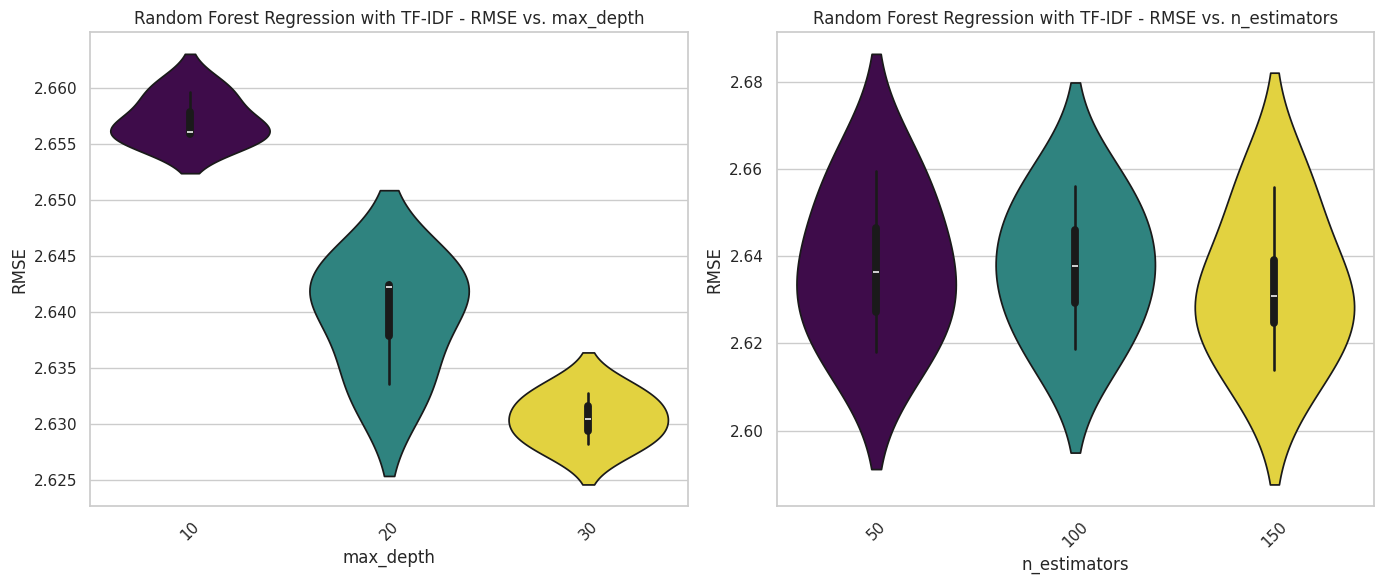

Plotting for Random Forest Regression using Word2Vec


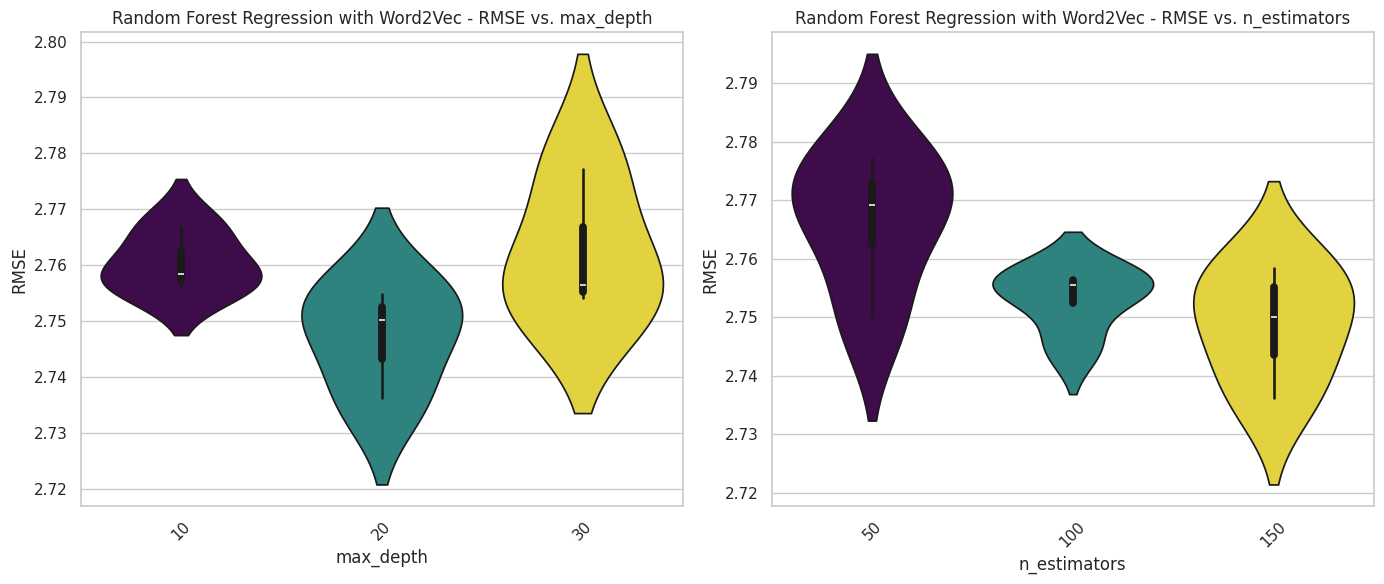

Plotting for Gradient Boosting Regression using Bag-of-Words


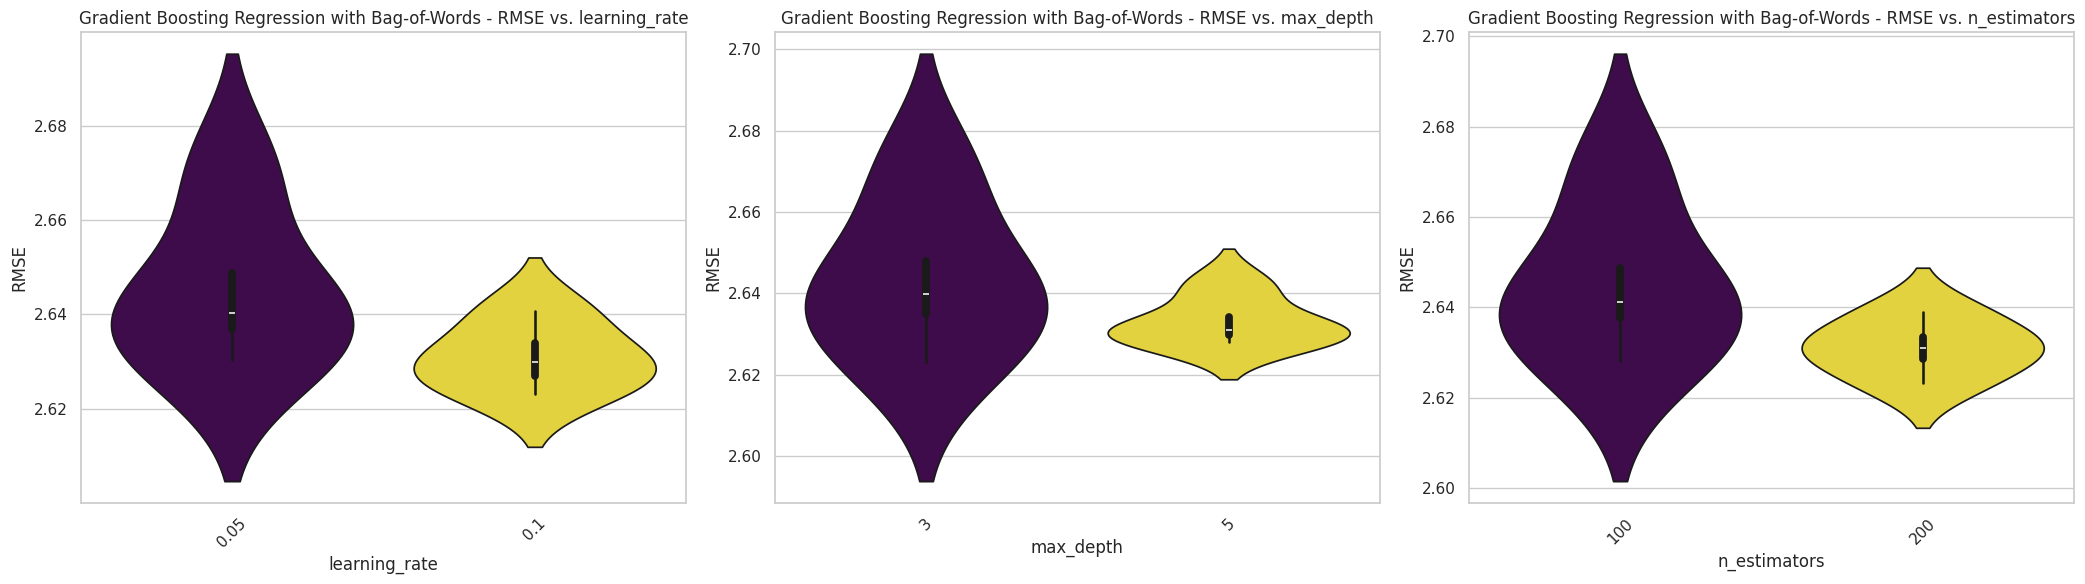

Plotting for Gradient Boosting Regression using TF-IDF


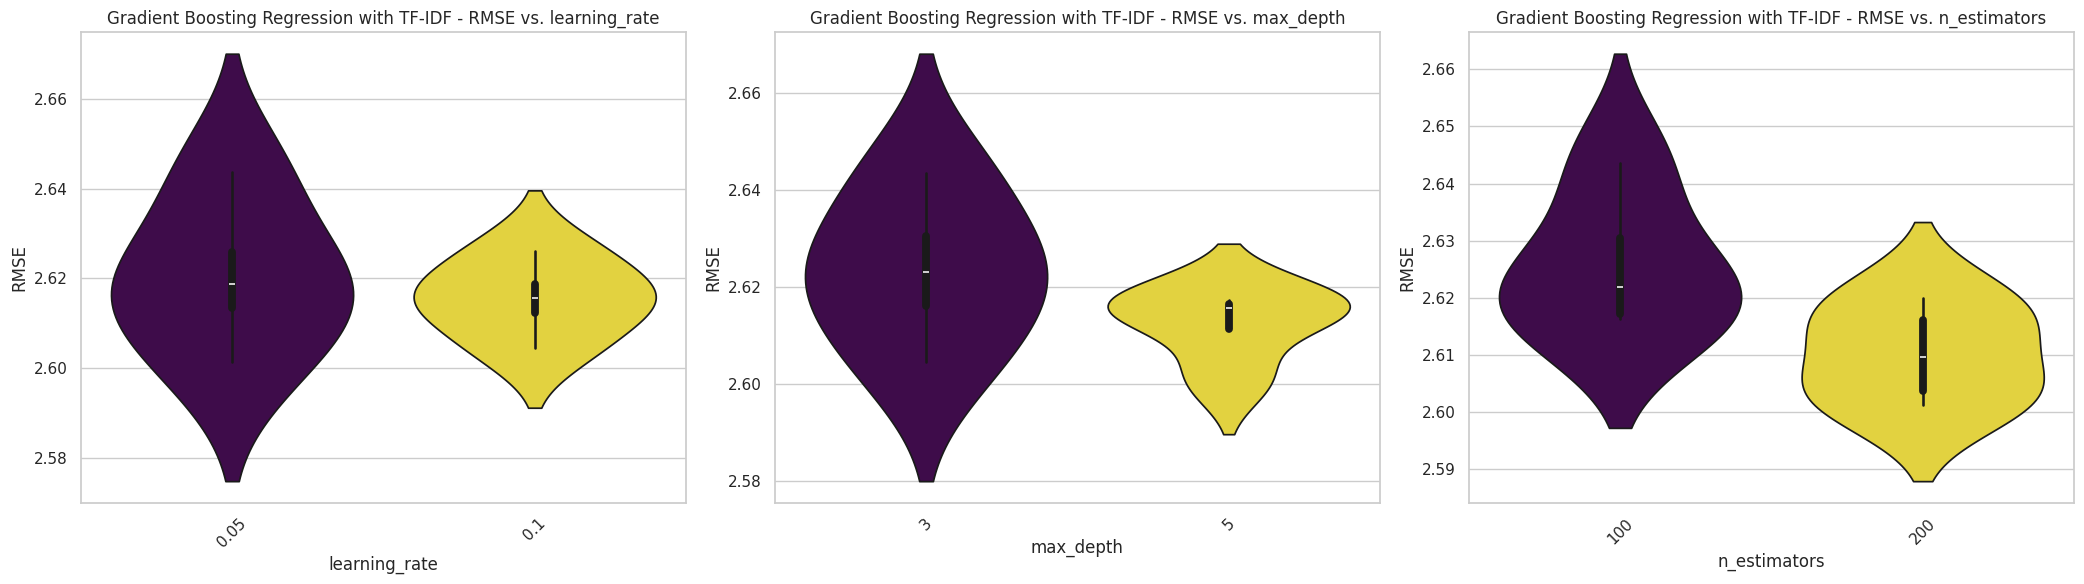

Plotting for Gradient Boosting Regression using Word2Vec


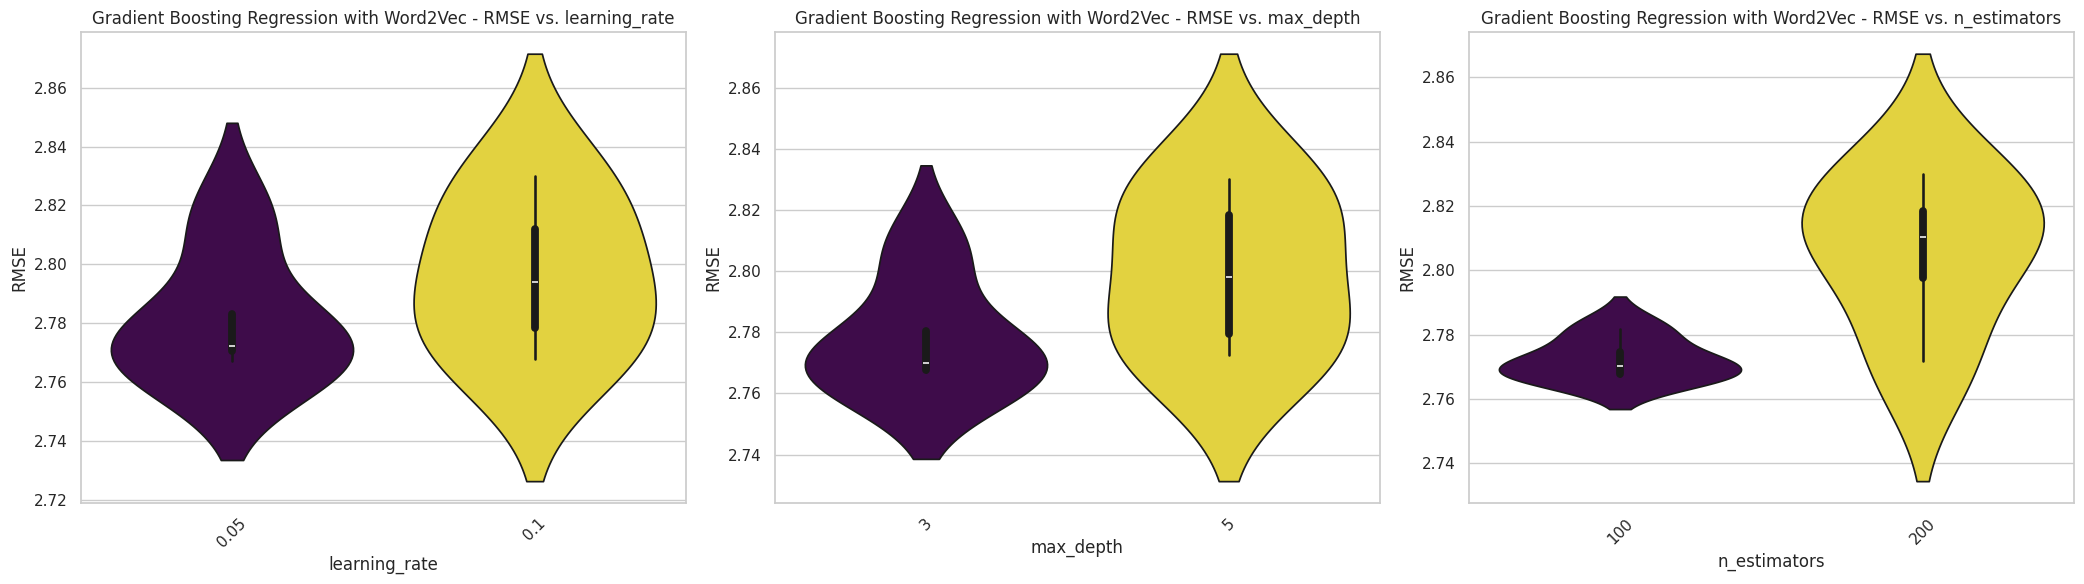

Plotting for SVR using Bag-of-Words


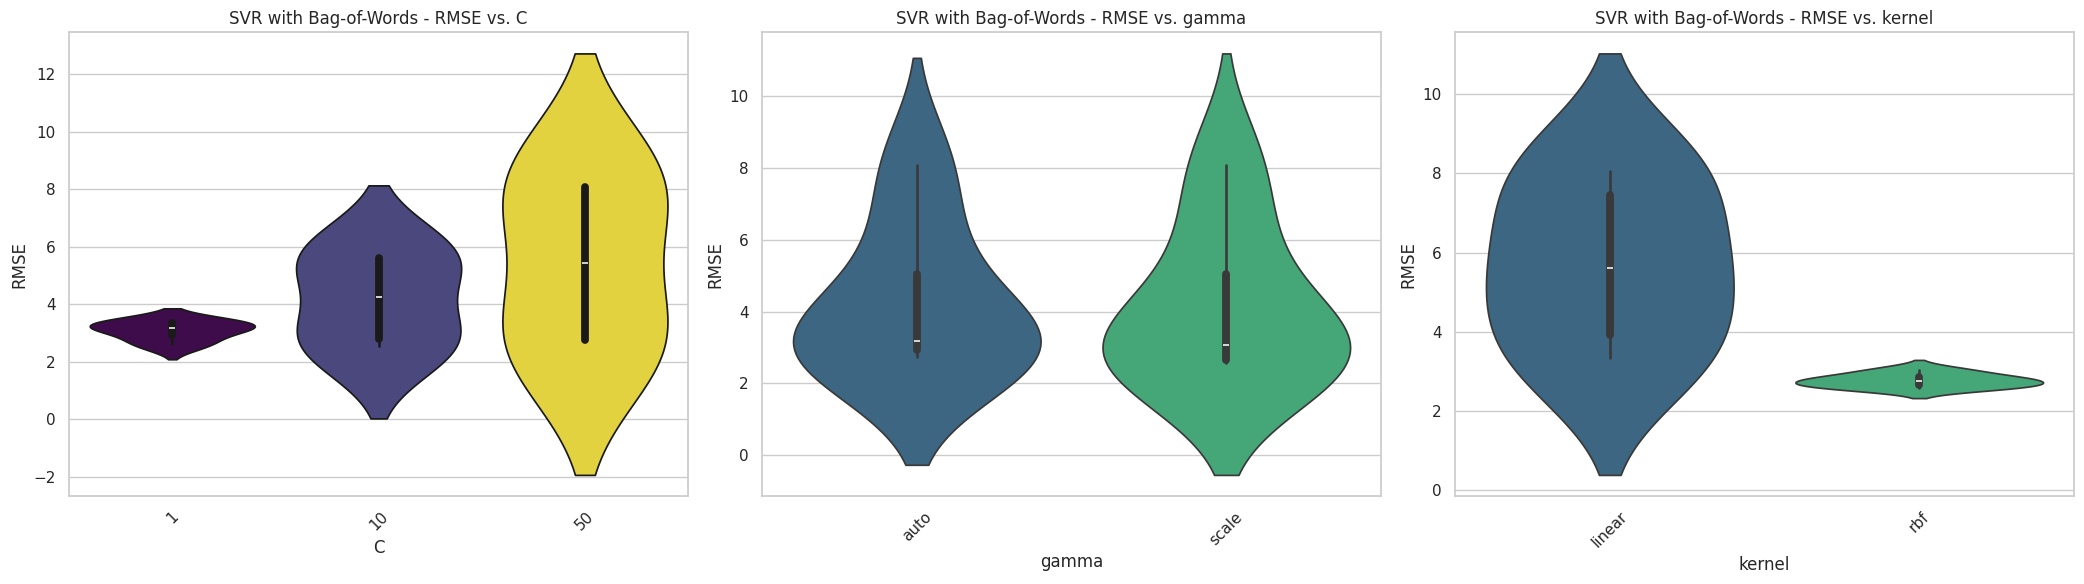

Plotting for SVR using TF-IDF


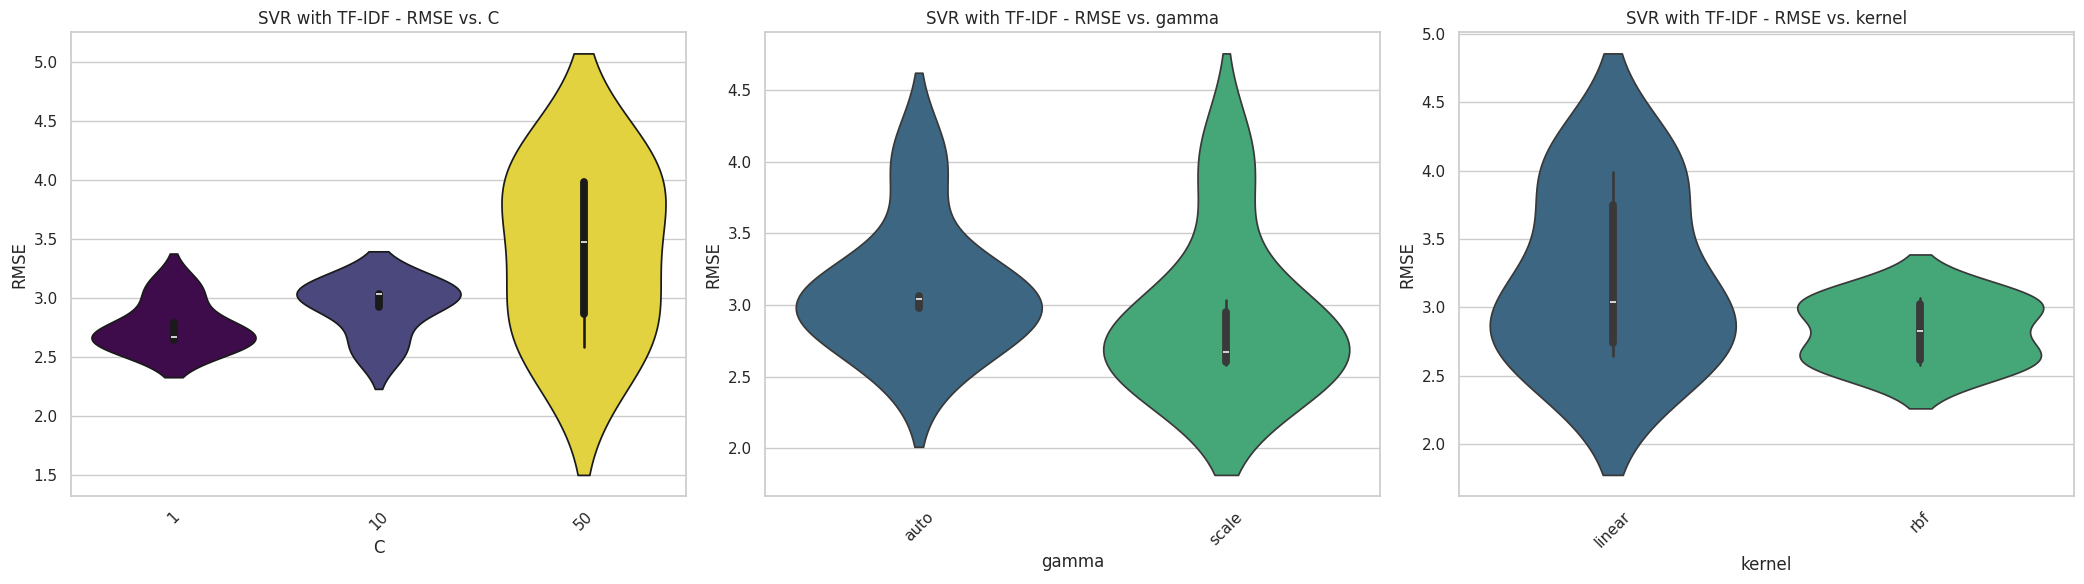

Plotting for SVR using Word2Vec


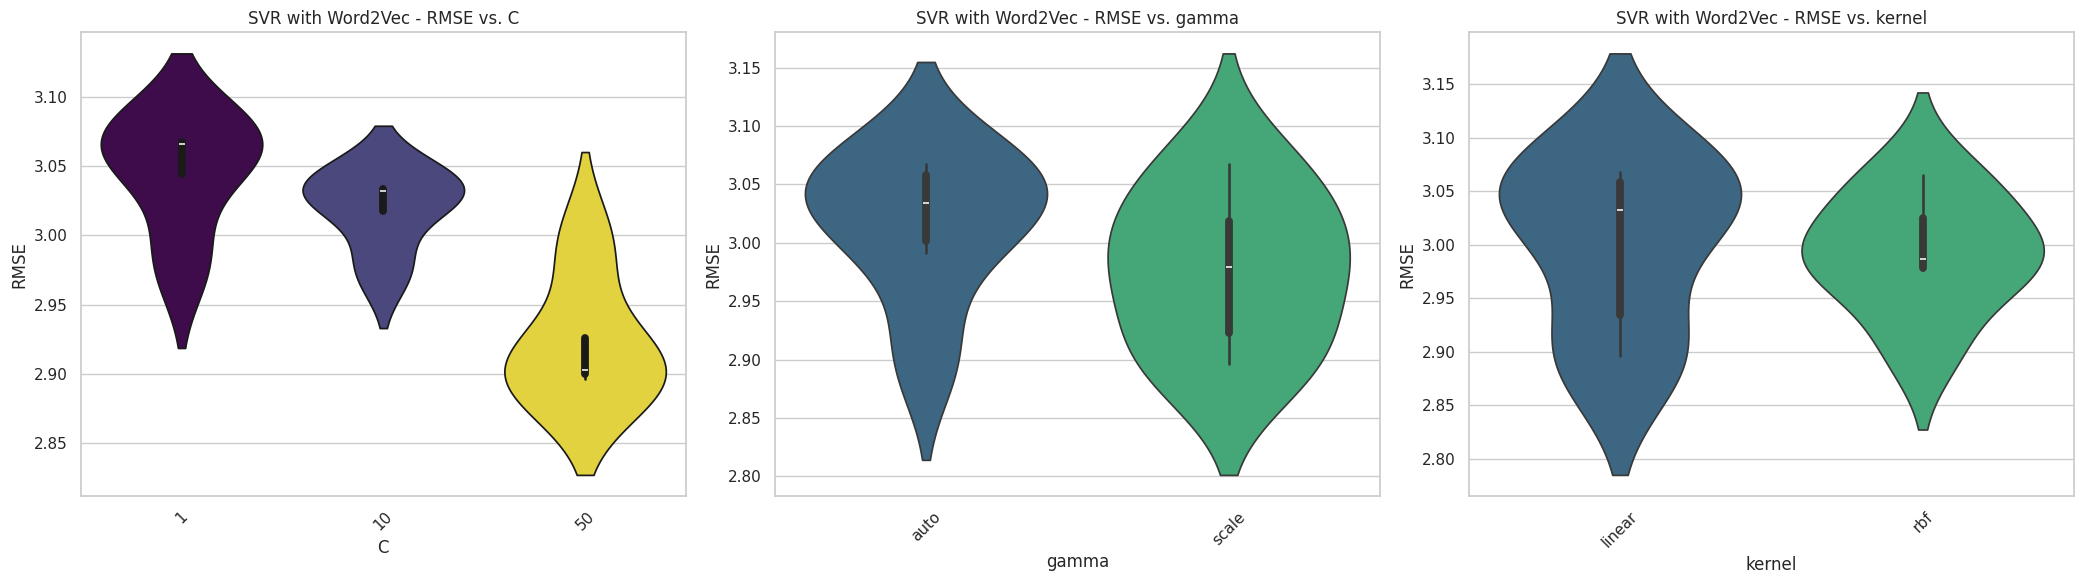

In [ ]:
# Define a function to plot RMSE against hyperparameters using advanced seaborn plots
def plot_rmse_hyperparameters_advanced(grid_search, model_name, vectorizer_name, plot_type='violin'):
    results = pd.DataFrame(grid_search.cv_results_)
    results['RMSE'] = np.sqrt(-results['mean_test_score'])

    # Identify parameter columns in DataFrame
    parameters = [col for col in results.columns if col.startswith('param_')]
    num_params = len(parameters)

    # Check if there are hyperparameters to plot
    if num_params == 0:
        print(f"No hyperparameters to plot for {model_name}.")
        return

    # Set up plot dimensions based on the number of parameters
    fig, axes = plt.subplots(1, num_params, figsize=(7 * num_params, 6))
    if num_params == 1:
        axes = [axes]

    # Plot RMSE for each hyperparameter
    for ax, param in zip(axes, parameters):
        subset = results.dropna(subset=[param]).sort_values(by=param)
        if plot_type == 'violin':
            sns.violinplot(x=param, y='RMSE', data=subset, ax=ax, hue=param, palette='viridis', legend=False)

        ax.set_title(f'{model_name} with {vectorizer_name} - RMSE vs. {param.split("__")[-1]}')
        ax.set_xlabel(param.split("__")[-1])
        ax.set_ylabel('RMSE')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Function to extract results from grid searches and plot them
def extract_and_plot_grid_search_results(grid_searches, configurations, plot_type='violin'):
    # Loop through each grid search and configuration
    for grid_search, config in zip(grid_searches, configurations):
        model_name = config['model_name']
        vectorizer_name = config['vectorizer_name']
        print(f"Plotting for {model_name} using {vectorizer_name}")
        plot_rmse_hyperparameters_advanced(grid_search, model_name, vectorizer_name, plot_type)


extract_and_plot_grid_search_results(regressor_benef.grid_searches, regressor_benef.configurations, plot_type='violin')

From the series of graphs depicting the impact of various hyperparameters on RMSE, we can observe how different adjustments affect the model's performance across various model-vectorizer combinations. For example, in the case of the Random Forest Regressor using Bag-of-Words (BoW), changes in the number of estimators did not significantly alter the RMSE. However, the maximum depth parameter showed a drastic effect on RMSE in the same model-vectorizer configuration. Specifically, setting the maximum depth to 10 led to a noticeable increase in RMSE, whereas a maximum depth of 30 reduced the RMSE substantially, and further adjustments to 20 optimized it even more. These observations illustrate that while some hyperparameters may have little to no effect on the model's accuracy, others can be critical, significantly enhancing or impairing the RMSE score. This underscores the importance of careful hyperparameter tuning in achieving the best possible model performance.

In [ ]:
import pickle

# Save variables to a file
with open('/content/drive/My Drive/violinVariables.pkl', 'wb') as f:
    pickle.dump((regressor_benef.grid_searches, regressor_benef.configurations), f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
